# SOMETHING 

In [ ]:
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 10

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import arviz as az

In [ ]:
MU_TRUE = 3
SIGMA_TRUE = .5

N = 50
z = np.random.normal(loc=MU_TRUE, scale=SIGMA_TRUE, size=N)
error_z = np.random.rand(N) * .1
z_obs = z + error_z

fig, ax = plt.subplots(2,2)

ax[0,0].plot(z, linestyle='', marker='o', color='green')
ax[0,1].hist(z, orientation=u'horizontal')
ax[0,1].set_ylabel('$z$')
ax[0,1].set_xlabel('$dN/dz$')

ax[1,0].errorbar(np.linspace(0,N,N), z_obs, yerr=error_z, color='green', capsize=0, linestyle='', marker='o')
ax[1,1].hist(z_obs, orientation=u'horizontal', label='Observed')
ax[1,1].hist(z, orientation=u'horizontal', fill=False, histtype='step', label='True')
ax[1,1].legend(ncol=2)
ax[1,1].set_ylabel('$z$')
ax[1,1].set_xlabel('$dN/dz$')

# Est. param of ST. Line

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)
m_true = -1
b_true = 2

Text(0, 0.5, 'y')

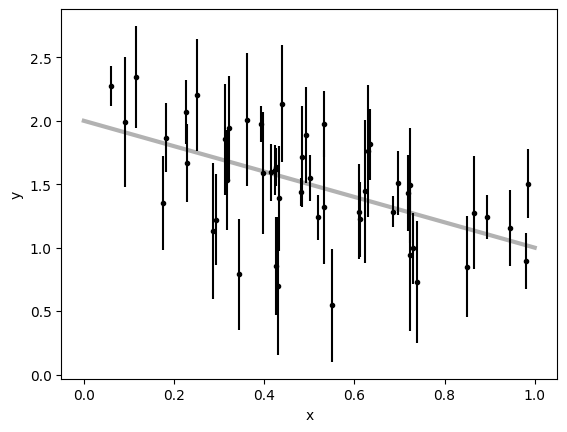

In [3]:
N = 50
x = np.sort(np.random.rand(N))

yerr = 0.1 + 0.5 * np.random.rand(N)

y = m_true * x + b_true
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 1, 50)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlabel("x")
plt.ylabel("y")

In [4]:
def log_likelihood(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2*np.pi*sigma2))

Maximum likelihood estimates:
m = -1.123
b = 2.105


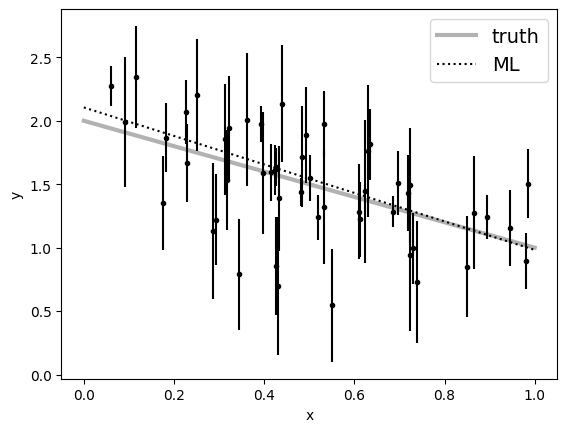

In [5]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlabel("x")
plt.ylabel("y");


In [6]:
def log_prior(theta):
    m, b = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0:
        return 0.0
    return -np.inf

In [7]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


In [8]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, yerr)
)
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:01<00:00, 2560.72it/s]


State([[-0.99236627  2.03347333]
 [-0.92506791  2.06490281]
 [-1.13154777  2.12340028]
 [-1.06481783  2.05710167]
 [-1.04594207  2.10186079]
 [-1.09321264  2.10676136]
 [-1.27470844  2.19723728]
 [-1.17217792  2.07251749]
 [-1.10317267  2.05263149]
 [-1.19499647  2.08746697]
 [-1.4004937   2.24181816]
 [-1.14579182  2.10810616]
 [-1.36852721  2.2209672 ]
 [-1.18806993  2.17321346]
 [-1.07383228  2.10763191]
 [-1.10659716  2.13576004]
 [-0.91192583  2.06037326]
 [-1.05929816  2.07971764]
 [-1.22714773  2.20507615]
 [-1.17334225  2.08182258]
 [-0.9537277   2.02628813]
 [-1.01678076  2.0228328 ]
 [-0.94891777  2.02734425]
 [-0.94608103  1.96653272]
 [-1.25227456  2.19087602]
 [-1.376758    2.24748205]
 [-1.07829319  2.1009845 ]
 [-1.41229939  2.22348168]
 [-1.30615793  2.22498286]
 [-1.37832543  2.21549709]
 [-1.20237246  2.03938433]
 [-1.32587316  2.2583294 ]], log_prob=[-17.19825966 -18.98323736 -16.93730001 -17.05532637 -17.45821576
 -16.98619874 -17.37901809 -18.15511524 -17.54185552 

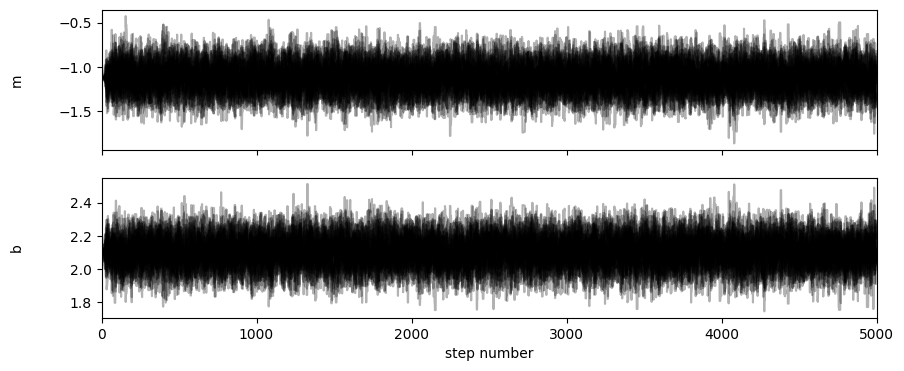

In [9]:
fig, axes = plt.subplots(2, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");


In [10]:
tau = sampler.get_autocorr_time()
print(tau)

[30.65267017 30.7001897 ]


In [11]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 2)


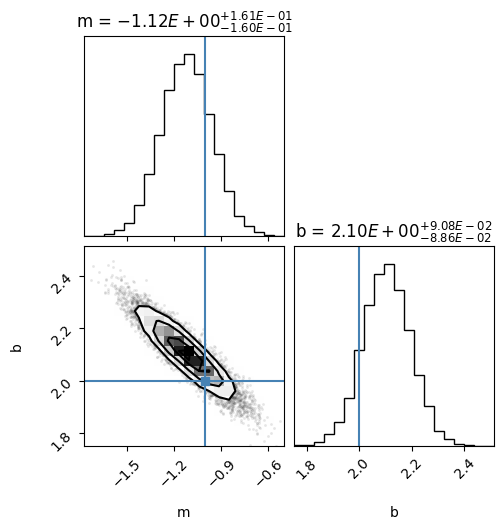

In [12]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# Est. param of a. Gaussian

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [14]:
np.random.seed(123)
mu_true = 5
sigma_true = .5

Text(0, 0.5, 'y')

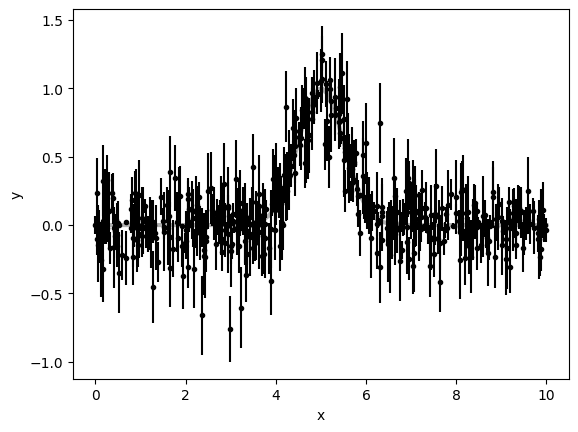

In [15]:
N = 500
x = np.sort(10 * np.random.rand(N))

yerr = 0.3 * np.random.rand(N)

y = np.exp(-(x-mu_true)**2 / sigma_true)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 100)
plt.plot(x0, np.exp(-(x0-mu_true)**2 / sigma_true), "k", alpha=0.3, lw=3)
plt.xlabel("x")
plt.ylabel("y")

In [16]:
def log_likelihood(theta, x, y, yerr):
    mu, sigma = theta
    model = np.exp(-(x-mu)**2 / sigma)
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2*np.pi*sigma2))

In [17]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([mu_true, sigma_true]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(x, y, yerr))
mu_ml, sigma_ml = soln.x

print("Maximum likelihood estimates:")
print("mu = {0:.3f}".format(mu_true))
print("sigma = {0:.3f}".format(sigma_ml))



Maximum likelihood estimates:
mu = 5.000
sigma = 0.498


In [18]:
def log_prior(theta):
    mu, sigma = theta
    if 0 < mu < 10 and 0 < sigma < 1.0:
        return 0.0
    return -np.inf

In [19]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


In [20]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, yerr)
)
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:02<00:00, 1790.28it/s]


State([[5.00846293 0.49915091]
 [5.00780364 0.49488154]
 [5.00328869 0.49916502]
 [5.00013063 0.49747434]
 [4.99808123 0.49692116]
 [5.00046893 0.4987595 ]
 [5.00298759 0.50180034]
 [4.99750954 0.49584148]
 [5.00604133 0.49521145]
 [4.99598957 0.49468406]
 [5.00639407 0.49321658]
 [5.00977055 0.49362969]
 [5.00370753 0.49900032]
 [5.00174873 0.49777068]
 [5.00465067 0.49838056]
 [5.00531146 0.50055952]
 [5.00554109 0.50154868]
 [5.00384275 0.49709441]
 [5.00266987 0.50336995]
 [5.00271094 0.49664905]
 [4.99781034 0.50071394]
 [5.00651346 0.49531686]
 [5.00519854 0.49407162]
 [4.99782433 0.4926984 ]
 [5.0019249  0.49868199]
 [5.0027462  0.49884729]
 [5.00572085 0.49786657]
 [4.99918585 0.49401505]
 [5.00453373 0.49710794]
 [5.00734146 0.49450724]
 [5.00484735 0.48903495]
 [5.00692495 0.49907439]], log_prob=[403.73515962 403.81927141 404.8264327  404.46701886 403.71577142
 404.49542091 404.28944214 403.37849052 404.41396209 402.37623761
 403.86666547 402.62608188 404.84056185 404.8004004

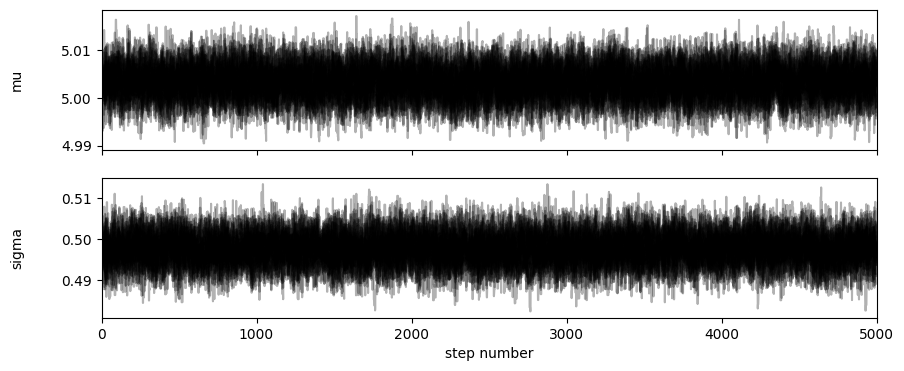

In [21]:
fig, axes = plt.subplots(2, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
labels = ["mu", "sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");


In [22]:
tau = sampler.get_autocorr_time()
print(tau)

[28.56568    30.99922033]


In [23]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 2)


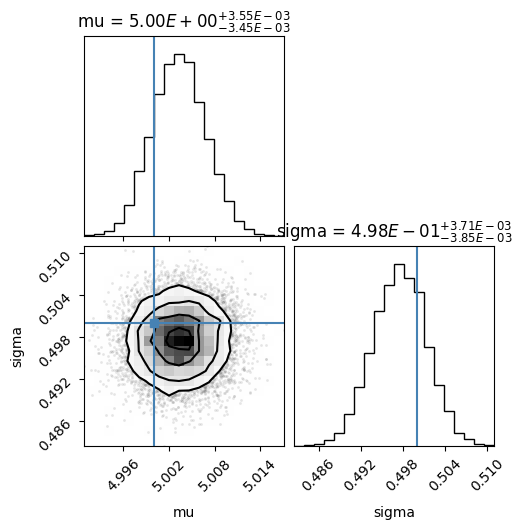

In [24]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[mu_true, sigma_true], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# Bimodal distribution

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

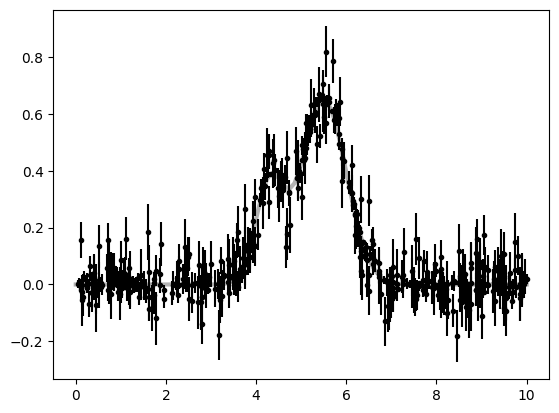

In [26]:
SEEDS = 500
A = .35
MU_A = 4.3
MU_B = 5.5
SIGMA_A = .2
SIGMA_B = .5

z = np.sort(10 * np.random.rand(SEEDS))

ERROR_IN_PARAM = 0.1 * np.random.rand(SEEDS)

y = A * np.exp(-(z-MU_A)**2 / SIGMA_A) + (1-A) * np.exp(-(z-MU_B)**2 / SIGMA_B)
y += ERROR_IN_PARAM * np.random.randn(SEEDS)

# TESTING DISTRIBUTIONS

plt.errorbar(z, y, yerr=ERROR_IN_PARAM, fmt=".k", capsize=0)
z0 = np.linspace(0, 10, 100)
plt.plot(z0, A * np.exp(-(z0-MU_A)**2 / SIGMA_A) + (1-A) * np.exp(-(z0-MU_B)**2 / SIGMA_B), "k", alpha=0.3, lw=3)

In [27]:
def log_likelihood(theta, z, y, yerr):
    a, mu_a, sigma_a, mu_b, sigma_b  = theta
    model = a * np.exp(-(z-mu_a)**2 / sigma_a) + (1-a) * np.exp(-(z-mu_b)**2 / sigma_b)
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2*np.pi*sigma2))

In [28]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([A, MU_A, SIGMA_A, MU_B, SIGMA_B]) + 0.1 * np.random.randn(5)
soln = minimize(nll, initial, args=(z, y, ERROR_IN_PARAM))
a_ml, mu_a_ml, sigma_a_ml, mu_b_ml, sigma_b_ml = soln.x

print("Maximum likelihood estimates:")
print("A= {0:.3f}".format(a_ml))
print("MU_A = {0:.3f}".format(mu_a_ml))
print("SIGMA_A = {0:.3f}".format(sigma_b_ml))
print("MU_B = {0:.3f}".format(mu_b_ml))
print("SIGMA_B = {0:.3f}".format(sigma_b_ml))


Maximum likelihood estimates:
A= 0.349
MU_A = 4.292
SIGMA_A = 0.504
MU_B = 5.500
SIGMA_B = 0.504


/tmp/ipykernel_31956/3106713249.py:5: RuntimeWarning: overflow encountered in square
  return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2*np.pi*sigma2))
/tmp/ipykernel_31956/3106713249.py:5: RuntimeWarning: overflow encountered in true_divide
  return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2*np.pi*sigma2))
/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/tmp/ipykernel_31956/3106713249.py:5: RuntimeWarning: overflow encountered in square
  return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2*np.pi*sigma2))
/tmp/ipykernel_31956/3106713249.py:5: RuntimeWarning: overflow encountered in true_divide
  return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2*np.pi*sigma2))


In [29]:
def log_prior(theta):
    a, mu_a, sigma_a, mu_b, sigma_b = theta
    if 0 < a < 1 and 0 < mu_a < 5 and 0 < sigma_a < 1 and 2 < mu_b < 7 and 0 < sigma_b < 1:
        return 0.0
    return -np.inf

In [30]:
def log_probability(theta, z, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, y, yerr)


In [31]:
import emcee

pos = soln.x + 1e-6 * np.random.randn(50, 5)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(z, y, ERROR_IN_PARAM)
)
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:05<00:00, 866.66it/s]


State([[0.35045656 4.29543556 0.20268642 5.50155881 0.5012968 ]
 [0.35064078 4.28481967 0.19100962 5.49730362 0.50819779]
 [0.34700851 4.30351952 0.21309568 5.50619103 0.49516309]
 [0.34912835 4.30152151 0.20162114 5.50263996 0.50137281]
 [0.3499224  4.29944013 0.2039344  5.50265106 0.50241232]
 [0.34736177 4.30832778 0.20200504 5.50370065 0.49898844]
 [0.34908505 4.30730453 0.1990289  5.50329338 0.50082862]
 [0.35014263 4.28118052 0.18302694 5.49377348 0.51098361]
 [0.34953521 4.2904464  0.19195949 5.49900699 0.50831888]
 [0.35083266 4.29040959 0.19043729 5.49723247 0.50965002]
 [0.34942631 4.29713079 0.20253479 5.50020177 0.50101475]
 [0.34915112 4.29173158 0.19669101 5.49978318 0.50519556]
 [0.3488661  4.28298502 0.1938819  5.49858154 0.50758687]
 [0.34794448 4.30696965 0.20063249 5.50373015 0.49861738]
 [0.34890782 4.28674203 0.19214758 5.49871586 0.50702581]
 [0.34945721 4.29772518 0.20102122 5.50260226 0.50388773]
 [0.3483029  4.29514965 0.19989578 5.50177564 0.50071164]
 [0.3504

Text(0.5, 0, 'step number')

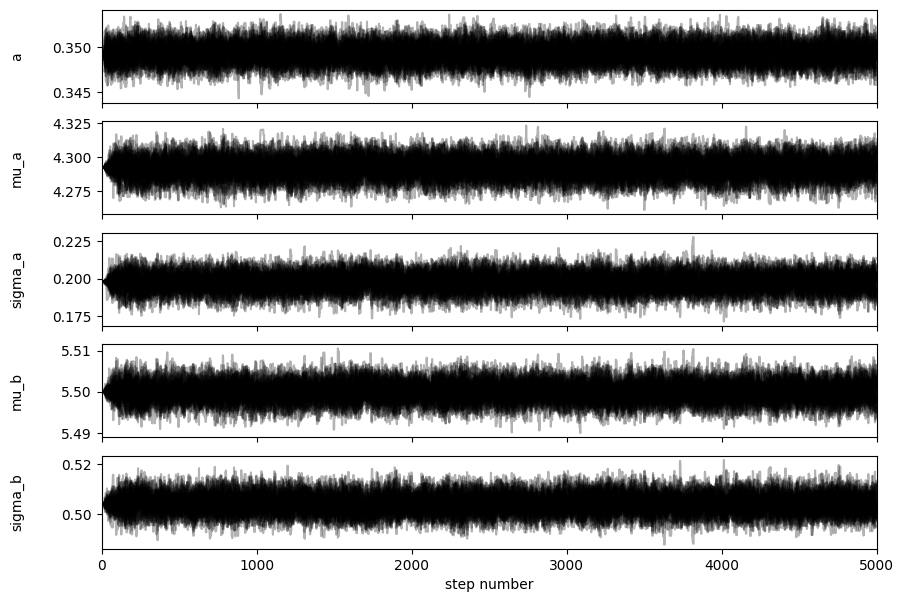

In [32]:
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a", "mu_a", "sigma_a", "mu_b", "sigma_b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")


In [33]:
tau = sampler.get_autocorr_time()
print(tau)

[49.43780444 54.30816119 56.93930674 57.93607147 55.53127938]


In [34]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(16300, 5)


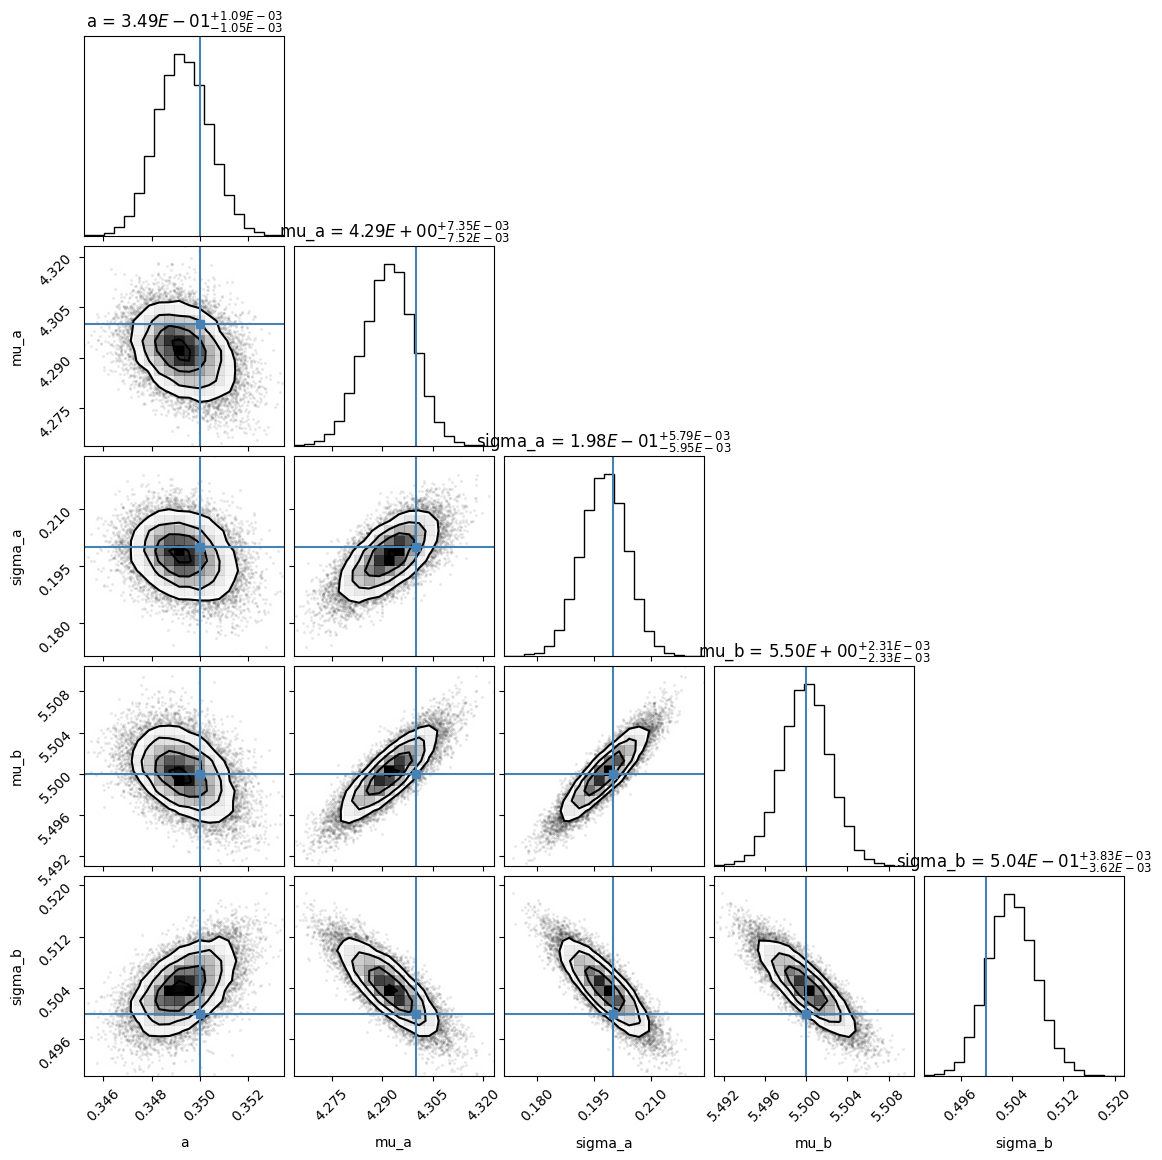

In [35]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[A, MU_A, SIGMA_A, MU_B, SIGMA_B], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# HM model

In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

In [2]:
def generate_data(mean, scale, size):
    """
    Function to generate a Gaussian distribution with specified mean,
    scale and size. 
    """
    return np.random.normal(loc=mean, scale=scale, size=size)

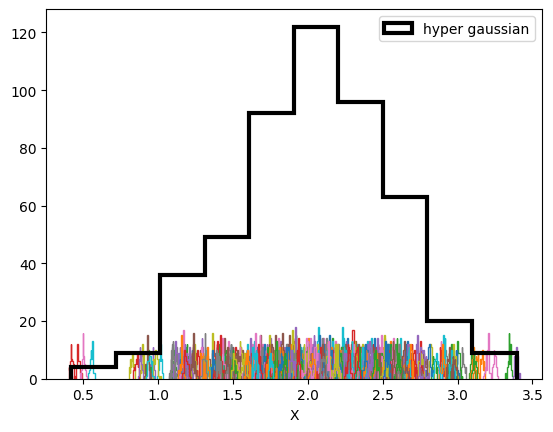

In [12]:
# True parameters for the parent + child Gaussian distribution

true_parent_mean = 2.0 # hyperparameter
true_parent_scale = .5 # hyperparameter
true_child_scale = 0.01

N_obs = 500
size_child = 50

# Hypothesis for parent gaussian 
hyper_gaussian = generate_data(true_parent_mean, true_parent_scale, size=N_obs)

true_gaussian = np.random.normal(loc=hyper_gaussian[:, np.newaxis], scale=true_child_scale, size=(N_obs, size_child))

for i in range(N_obs):
    plt.hist(true_gaussian[i], fill=False, histtype='step')
plt.hist(hyper_gaussian, fill=False, histtype='step', color='black',linewidth=3, label='hyper gaussian')
plt.xlabel("X")
plt.legend()

In [13]:
def hierarchical_model(params):
    """
    Generate child data from the hierarchical model in steps 
    of first generating a parent data which then will be used 
    to generate child data.
    """
    parent_mean, parent_scale = params
    parent_data = generate_data(parent_mean, parent_scale, size=N_obs)
    child_data = np.random.normal(loc=parent_data[:, np.newaxis], scale=true_child_scale, size=(N_obs, size_child))
    return child_data

In [14]:
def log_likelihood(params):
    # parent_mean, parent_scale = params 
    # above not required here ?
    model_data = hierarchical_model(params)
    residuals = true_gaussian - model_data
    
    # Q : is the scaling correct here ?
    
    chi_square = np.sum(residuals**2 / (2 * true_child_scale**2) + np.log(2 * np.pi * true_child_scale**2))
    #chi_square = np.sum(residuals**2)
    return - 0.5 * chi_square

def log_prior(params):
    parent_mean, parent_scale = params
    # Flat priors 
    if (0 < parent_mean < 5 and 
        0 < parent_scale < 1):
        
        return 0.0
    
    return -np.inf

def log_posterior(params):
    log_prior_val = log_prior(params)
    if not np.isfinite(log_prior_val):
        return -np.inf
    return log_prior_val + log_likelihood(params)

In [15]:
# Initial parameter values (guess values use of ML ?)
initial_params = [1.0, 0.1]

# Number of walkers (chains) and number of steps
n_walkers = 20
n_steps = 5000

initial_positions = [initial_params + 1e-2 * np.random.randn(2) for _ in range(n_walkers)]

ndim = len(initial_params)
sampler = emcee.EnsembleSampler(n_walkers, ndim, log_posterior)
sampler.run_mcmc(initial_positions, n_steps, progress=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:42<00:00, 116.51it/s]


State([[2.03335347 0.03675703]
 [2.02856691 0.04550565]
 [2.04213076 0.06947873]
 [2.03709634 0.08173634]
 [2.03777563 0.10547672]
 [2.02964635 0.04002018]
 [2.04673897 0.07565989]
 [2.02552869 0.08371947]
 [2.06785083 0.10278717]
 [2.01510041 0.05749803]
 [2.02857154 0.04270028]
 [2.02584021 0.04910651]
 [1.99196108 0.05693419]
 [2.00381697 0.06511142]
 [2.01031943 0.07207166]
 [2.00900033 0.06162646]
 [2.02088897 0.05443413]
 [1.99656281 0.08299764]
 [2.05010041 0.06635536]
 [2.06140185 0.06297627]], log_prob=[-15803661.62965247 -15649455.64883515 -15747145.33489704
 -15717209.55339955 -15878298.91782836 -15803163.72114137
 -15699602.13305538 -15666487.0163691  -15820515.21855081
 -15639254.53492035 -15719623.94379427 -15712867.16377389
 -15751797.26880463 -15693367.39314192 -15713596.00613295
 -15743045.62169767 -15625049.0323382  -15837619.09067301
 -15740786.55595789 -15665491.29280231], blobs=None, random_state=('MT19937', array([2054216977, 2808828006, 1099994936, 2482758023, 14

Text(0.5, 0, 'step number')

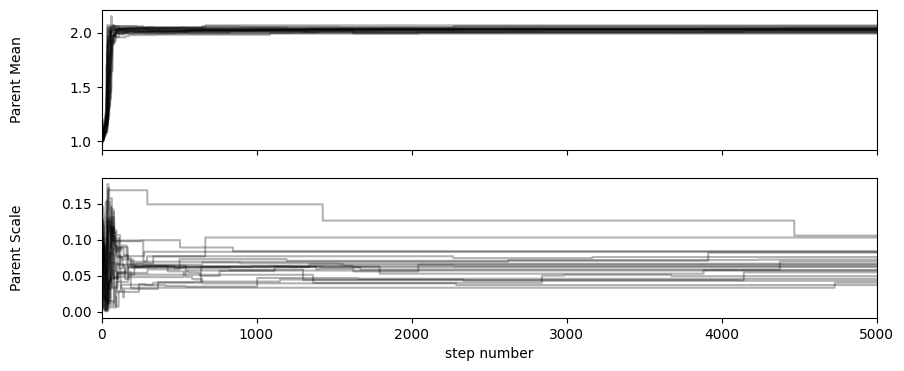

In [16]:
fig, axes = plt.subplots(2, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
labels = ["Parent Mean", "Parent Scale"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [17]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [ 57.35208771 281.13636691]

In [10]:
flat_samples = sampler.get_chain(discard=100, thin=10, flat=True) 
print(flat_samples.shape)

(9800, 2)


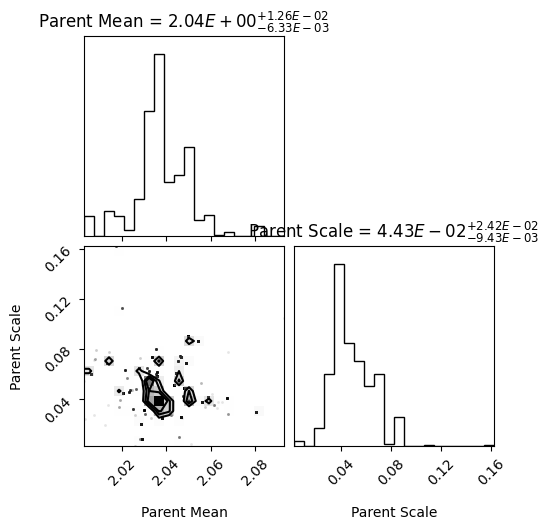

In [11]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_parent_mean, true_parent_scale], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# HM but inv

## test-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
np.random.seed(123)
mu_true = 2
sigma_true = .5
N = 100

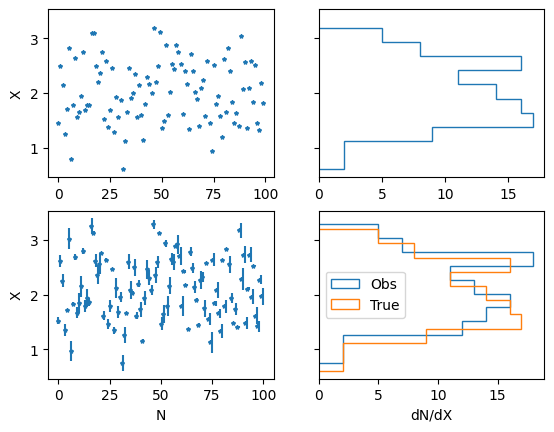

In [3]:
X = sigma_true * np.random.randn(N) + mu_true

fig, ax = plt.subplots(2,2, sharey=True)

ax[0,0].plot(X, linestyle='', marker='*', markersize=3)
ax[0,1].hist(X, orientation=u'horizontal', fill=False, histtype='step')
ax[0,0].set_ylabel('X')
X_err = 0.2 * np.random.random(N)
X_obs = X + X_err

ax[1,0].errorbar(np.linspace(0,N,N), X_obs, yerr=X_err, fmt="none", capsize=0)
ax[1,0].plot(X_obs, linestyle='', marker='*', markersize=3)
ax[1,1].hist(X_obs, orientation=u'horizontal', fill=False, histtype='step',label='Obs')
ax[1,1].hist(X, orientation=u'horizontal', fill=False, histtype='step', label='True')
ax[1,0].set_ylabel('X')
ax[1,0].set_xlabel('N')
ax[1,1].set_xlabel('dN/dX')
plt.legend()

In [4]:
def log_likelihood(theta, x_i, x_err):
    """
    theta : parameters
    x_i : observed values of X
    x_err : scaling of x_i's
    """
    mu, sigma = theta
    # new x_i's are generated from the hyper params
    model = sigma * np.random.randn(N) + mu
    sigma = x_err
    return -0.5 * np.sum((x_i - model) ** 2 / sigma**2 + np.log(2*np.pi*sigma**2))

In [5]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([mu_true, sigma_true]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(X_obs, X_err))
mu_ml, sigma_ml = soln.x

print("Maximum likelihood estimates:")
print("mu = {0:.3f}".format(mu_ml))
print("sigma = {0:.3f}".format(sigma_ml))

Maximum likelihood estimates:
mu = 2.050
sigma = 0.486


In [6]:
def log_prior(theta):
    """
    theta : parameters
    """
    mu, sigma = theta # hyperpriors
    if -5 < mu < 5 and 0 < sigma < 1.0:
        return 0.0
    return -np.inf

In [7]:
def log_posterior(theta, x_i, x_err):
    """
    theta : parameters
    x_i : observed values of X
    x_err : scaling of x_i's
    """
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x_i, x_err)

In [8]:
import emcee

pos = soln.x + 1e-1 * np.random.randn(5, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior, args=[X_obs, X_err]
)
sampler.run_mcmc(pos, 20000, progress=True)

100%|██████████| 20000/20000 [00:03<00:00, 5889.10it/s]


State([[2.20973401 0.56509991]
 [2.2750706  0.44447249]
 [2.29988028 0.50116141]
 [2.2288229  0.49205508]
 [1.98955465 0.62235269]], log_prob=[-16749.94215171 -15512.72496184 -15872.72066633 -14831.51435557
 -18331.04491065], blobs=None, random_state=('MT19937', array([1311818410, 2539395702, 3347530291, 1034442367, 2987172929,
       1669981128,  216566154,  260349724, 3979318839, 4105851067,
       2568347777, 1284884550,  309435818, 2757879550, 1952652312,
       2385907374,  284598398, 1036997140,   68918056, 1667452013,
       4093307207, 3982728415, 2284470690, 2596772137, 4115258698,
       3302369440,  446725385, 1155185357, 3281526613,  109114102,
        944913089, 2212653403, 3883278088,  316774372, 3910450294,
       1127191725, 3412633996, 3182310360, 3798057314, 1954153664,
       1417288344, 2606613596, 3437102313, 3364170999, 3465658566,
       4246835269,  515999065, 2393457968, 4051986875, 1214539430,
        132642375, 1435207270,  686644272, 3235503781,  461801849,


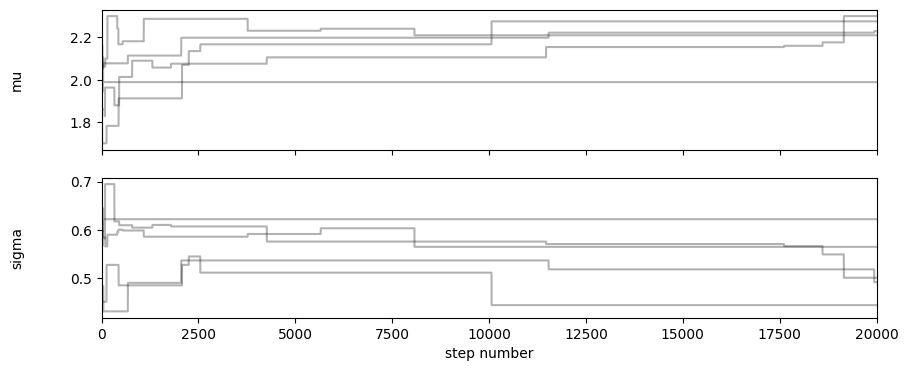

In [9]:
fig, axes = plt.subplots(2, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
labels = ["mu", "sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");


In [17]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [904.75261281 932.4030044 ]

In [13]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(3300, 2)


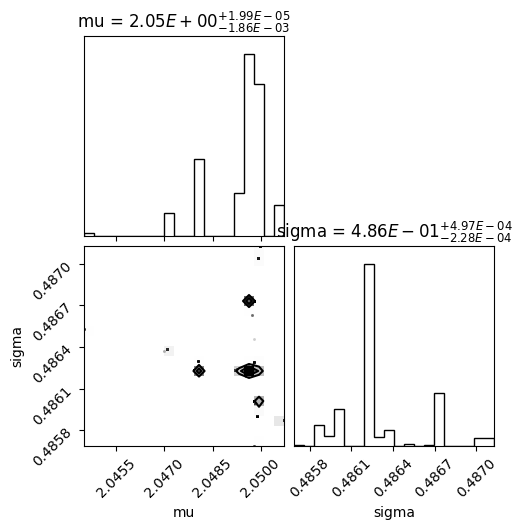

In [14]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[mu_true, sigma_true], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

## test-2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
np.random.seed(123)
mu_true = 5
sigma_true = 1
N_obs = 100

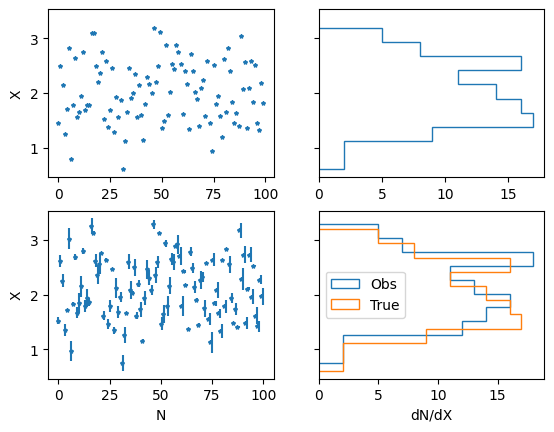

In [ ]:
X = sigma_true * np.random.randn(N) + mu_true

fig, ax = plt.subplots(2,2, sharey=True)

ax[0,0].plot(X, linestyle='', marker='*', markersize=3)
ax[0,1].hist(X, orientation=u'horizontal', fill=False, histtype='step')
ax[0,0].set_ylabel('X')
X_err = 0.2 * np.random.random(N)
X_obs = X + X_err

ax[1,0].errorbar(np.linspace(0,N,N), X_obs, yerr=X_err, fmt="none", capsize=0)
ax[1,0].plot(X_obs, linestyle='', marker='*', markersize=3)
ax[1,1].hist(X_obs, orientation=u'horizontal', fill=False, histtype='step',label='Obs')
ax[1,1].hist(X, orientation=u'horizontal', fill=False, histtype='step', label='True')
ax[1,0].set_ylabel('X')
ax[1,0].set_xlabel('N')
ax[1,1].set_xlabel('dN/dX')
plt.legend()

In [ ]:
def log_likelihood(theta, x_i, x_err):
    """
    theta : parameters
    x_i : observed values of X
    x_err : scaling of x_i's
    """
    mu, sigma = theta
    # new x_i's are generated from the hyper params
    model = sigma * np.random.randn(N) + mu
    sigma = x_err
    return -0.5 * np.sum((x_i - model) ** 2 / sigma**2 + np.log(2*np.pi*sigma**2))

In [ ]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([mu_true, sigma_true]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(X_obs, X_err))
mu_ml, sigma_ml = soln.x

print("Maximum likelihood estimates:")
print("mu = {0:.3f}".format(mu_ml))
print("sigma = {0:.3f}".format(sigma_ml))

Maximum likelihood estimates:
mu = 2.050
sigma = 0.486


In [ ]:
def log_prior(theta):
    """
    theta : parameters
    """
    mu, sigma = theta # hyperpriors
    if -5 < mu < 5 and 0 < sigma < 1.0:
        return 0.0
    return -np.inf

In [ ]:
def log_posterior(theta, x_i, x_err):
    """
    theta : parameters
    x_i : observed values of X
    x_err : scaling of x_i's
    """
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x_i, x_err)

In [ ]:
import emcee

pos = soln.x + 1e-1 * np.random.randn(5, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior, args=[X_obs, X_err]
)
sampler.run_mcmc(pos, 20000, progress=True)

100%|██████████| 20000/20000 [00:03<00:00, 5889.10it/s]


State([[2.20973401 0.56509991]
 [2.2750706  0.44447249]
 [2.29988028 0.50116141]
 [2.2288229  0.49205508]
 [1.98955465 0.62235269]], log_prob=[-16749.94215171 -15512.72496184 -15872.72066633 -14831.51435557
 -18331.04491065], blobs=None, random_state=('MT19937', array([1311818410, 2539395702, 3347530291, 1034442367, 2987172929,
       1669981128,  216566154,  260349724, 3979318839, 4105851067,
       2568347777, 1284884550,  309435818, 2757879550, 1952652312,
       2385907374,  284598398, 1036997140,   68918056, 1667452013,
       4093307207, 3982728415, 2284470690, 2596772137, 4115258698,
       3302369440,  446725385, 1155185357, 3281526613,  109114102,
        944913089, 2212653403, 3883278088,  316774372, 3910450294,
       1127191725, 3412633996, 3182310360, 3798057314, 1954153664,
       1417288344, 2606613596, 3437102313, 3364170999, 3465658566,
       4246835269,  515999065, 2393457968, 4051986875, 1214539430,
        132642375, 1435207270,  686644272, 3235503781,  461801849,


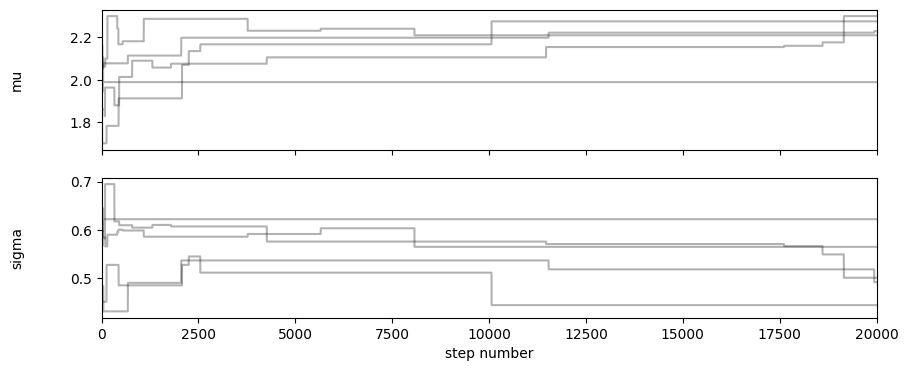

In [ ]:
fig, axes = plt.subplots(2, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
labels = ["mu", "sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");


In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(3300, 2)


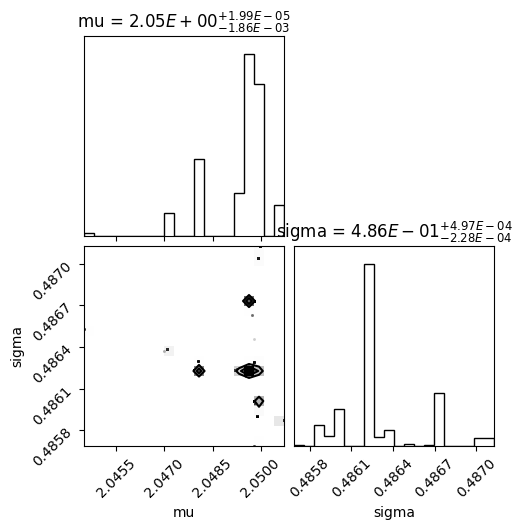

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[mu_true, sigma_true], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# Parent - Child (all Gaussians)

### mean of Child is derived from the Parent Gaussian

the trick used here is that fitting the child data for only the mean and the scale and not the whole child data

## mean is fixed

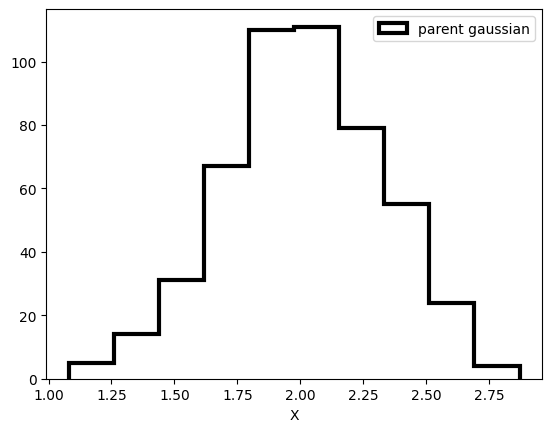

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent = 2
true_scale_parent = 0.32

true_scale_child = 0.01
N_obs, size_child = 500, 50

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu, sigma):
    return np.random.normal(loc=mu, scale=sigma, size=N_obs)

parent_data = gen_parent_data(true_mean_parent, true_scale_parent)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian')
plt.xlabel("X")
plt.legend()

(array([  5.,  14.,  31.,  67., 110., 111.,  79.,  55.,  24.,   4.]),
 array([1.07991386, 1.25899087, 1.43806788, 1.61714489, 1.7962219 ,
        1.97529891, 2.15437592, 2.33345293, 2.51252994, 2.69160694,
        2.87068395]),
 [<matplotlib.patches.Polygon at 0x7f521fa5bcd0>])

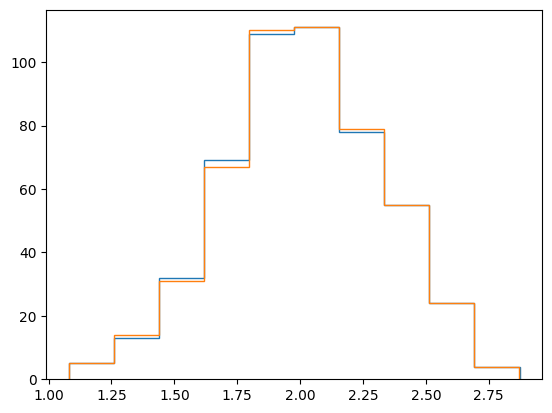

In [ ]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step')

In [ ]:
def log_liklihood(param):
    parent_sigma = param # mu is fixed and so is sigma
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = parent_sigma * np.random.randn(N_obs) + true_mean_parent
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_gaussian_prior(param):
    parent_sigma = param
    if (0 < parent_sigma < 1):
        return 0.0 # log(1) 0
    return -np.inf # log(0) -inf

def log_probability(param):
    lp = log_gaussian_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [ ]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_scale_parent]) + 0.1 * np.random.randn(1)
soln = minimize(nll, initial)
parent_sigma_ML = soln.x

print("Maximum likelihood estimates:")
print("sigma = {0:.3f}".format(soln.x[0]))

Maximum likelihood estimates:
sigma = 0.370


In [ ]:
import emcee

pos = soln.x[0] + 1e-2 * np.random.randn(50, 1)
nwalkers, ndim = pos.shape

from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability#, pool=pool
    )
sampler.run_mcmc(pos, 5000, progress=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:07<00:00, 634.63it/s]


State([[0.03006108]
 [0.03472866]
 [0.04426686]
 [0.0344983 ]
 [0.04312738]
 [0.02968405]
 [0.03579753]
 [0.03124899]
 [0.0631341 ]
 [0.03127916]
 [0.04816107]
 [0.06158234]
 [0.03486498]
 [0.02948617]
 [0.04178436]
 [0.03539481]
 [0.03170289]
 [0.03834585]
 [0.0453545 ]
 [0.02992683]
 [0.03995061]
 [0.05221103]
 [0.03472028]
 [0.02655308]
 [0.03726066]
 [0.04996101]
 [0.04425881]
 [0.02553828]
 [0.02929857]
 [0.03839987]
 [0.02884442]
 [0.02687699]
 [0.04045686]
 [0.03515119]
 [0.03861502]
 [0.03557141]
 [0.0270075 ]
 [0.02892071]
 [0.041485  ]
 [0.04631801]
 [0.05824281]
 [0.03478985]
 [0.02614007]
 [0.04152307]
 [0.03449451]
 [0.03426871]
 [0.05181273]
 [0.05039705]
 [0.03947072]
 [0.05407825]], log_prob=[-237858.82682499 -237187.44222043 -236469.74980327 -236996.62535663
 -238329.32916769 -238210.0181735  -236844.60178003 -238089.63731333
 -237264.41174552 -238437.40079426 -237746.34043502 -239194.72833211
 -238042.37582193 -238452.25757913 -237802.21076853 -237785.21659843
 -23841

(0.0, 5000.0)

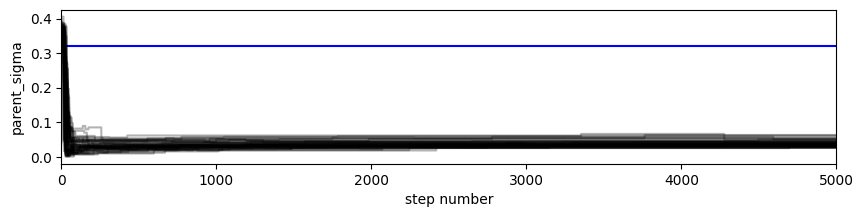

In [ ]:
fig, axes = plt.subplots(1, figsize=(10, 2), sharex=True)
samples = sampler.get_chain()
labels = ["parent_sigma"]
plt.hlines(true_scale_parent, 0, len(samples), color='blue')
plt.plot(samples[:, :, 0], "k", alpha=0.3)
plt.xlabel('step number')
plt.ylabel(labels[0])
plt.xlim(0,len(samples))

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

[38.868632]


In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=10, flat=True)
print(flat_samples.shape)

(24500, 1)


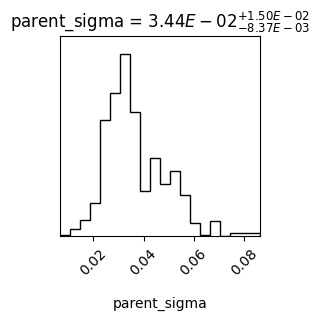

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_scale_parent], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

## scale is fixed

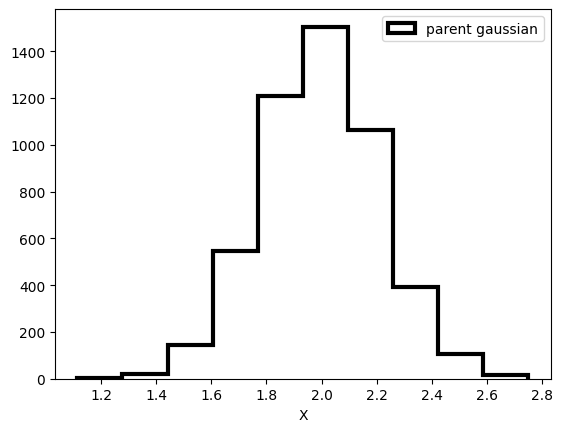

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent = 2
true_scale_parent = 0.21
true_scale_child = 0.01
N_obs, size_child = 5000, 50

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu, sigma):
    return np.random.normal(loc=mu, scale=sigma, size=N_obs)

parent_data = gen_parent_data(true_mean_parent, true_scale_parent)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian')
plt.xlabel("X")
plt.legend()

(array([1.000e+00, 2.000e+01, 1.430e+02, 5.470e+02, 1.207e+03, 1.505e+03,
        1.063e+03, 3.930e+02, 1.050e+02, 1.600e+01]),
 array([1.11442847, 1.27792915, 1.44142984, 1.60493053, 1.76843121,
        1.9319319 , 2.09543258, 2.25893327, 2.42243396, 2.58593464,
        2.74943533]),
 [<matplotlib.patches.Polygon at 0x7f13279b23b0>])

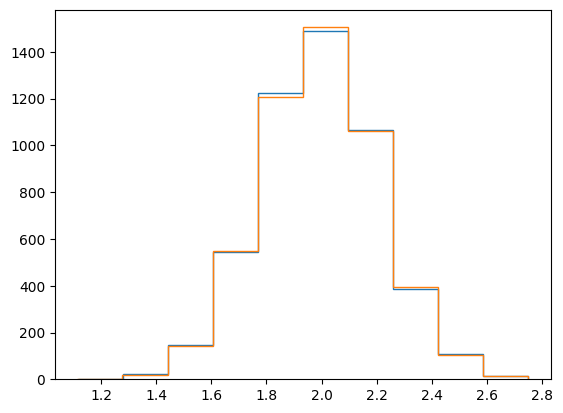

In [ ]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step')

In [ ]:
def log_liklihood(param):
    parent_mu = param # mu is fixed and so is sigma
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = true_scale_parent * np.random.randn(N_obs) + parent_mu
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_gaussian_prior(param):
    parent_mu = param
    if (0 < parent_mu < 5):
        return 0.0 # log(1) 0
    return -np.inf # log(0) -inf

def log_probability(param):
    lp = log_gaussian_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [ ]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent]) + 0.1 * np.random.randn(1)
soln = minimize(nll, initial)
parent_sigma_ML = soln.x

print("Maximum likelihood estimates:")
print("sigma = {0:.3f}".format(soln.x[0]))

Maximum likelihood estimates:
sigma = 2.050


In [ ]:
import emcee

pos = soln.x[0] + 1e-1 * np.random.randn(50, 1)
nwalkers, ndim = pos.shape

from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability#, pool=pool
    )
sampler.run_mcmc(pos, 10000, progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:29<00:00, 112.34it/s]


State([[2.01249647]
 [1.993095  ]
 [2.00384413]
 [1.9964873 ]
 [2.00070844]
 [1.98766223]
 [2.01279045]
 [2.0106896 ]
 [2.00235497]
 [2.01480887]
 [1.99145753]
 [2.00095048]
 [1.99727972]
 [1.97156126]
 [1.99693834]
 [2.01164141]
 [2.00964966]
 [1.98469879]
 [1.99999204]
 [1.98741157]
 [1.99593327]
 [1.99460413]
 [2.00230629]
 [2.01135471]
 [2.01650014]
 [2.01061805]
 [1.97033531]
 [1.9771831 ]
 [2.01170305]
 [1.99444355]
 [2.00130317]
 [2.0060404 ]
 [2.01532116]
 [1.99989203]
 [1.9911241 ]
 [1.99996064]
 [1.99915622]
 [1.983395  ]
 [2.00367132]
 [1.99815173]
 [2.01095409]
 [1.9932482 ]
 [2.00559337]
 [2.01766385]
 [2.01594904]
 [2.01090092]
 [1.97423248]
 [2.02550901]
 [1.99207622]
 [2.00484418]], log_prob=[-2040182.57217318 -2020952.86868901 -2050448.6929004  -2044555.8582443
 -2052558.02957912 -2050263.14900221 -2062335.58648929 -2051781.99604696
 -2049158.62618504 -2070328.83761648 -2034402.59054278 -2058114.25751695
 -2039040.25477717 -2049160.75117531 -2029327.1012635  -2035240.9

(0.0, 10000.0)

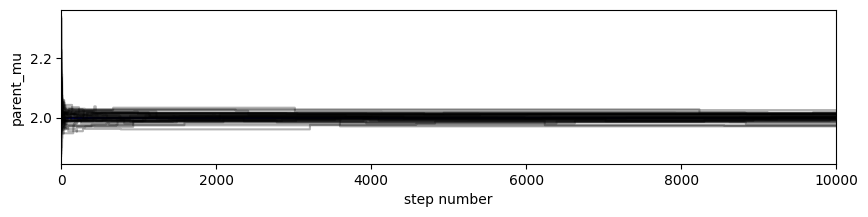

In [ ]:
fig, axes = plt.subplots(1, figsize=(10, 2), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu"]
plt.hlines(true_mean_parent, 0, len(samples), color='blue')
plt.plot(samples[:, :, 0], "k", alpha=0.3)
plt.xlabel('step number')
plt.ylabel(labels[0])
plt.xlim(0,len(samples))

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [917.70898436]

In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=10, flat=True)
print(flat_samples.shape)

(49500, 1)


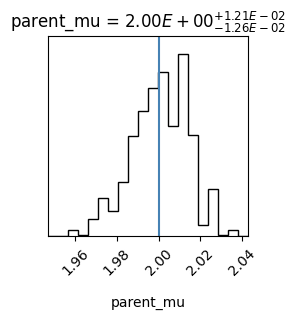

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

## all varying 

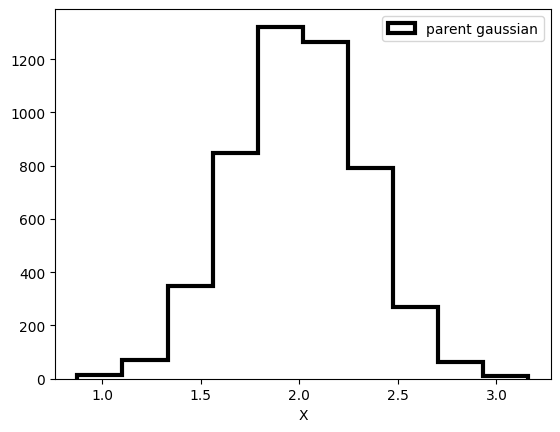

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent = 2
true_scale_parent = 0.32
true_scale_child = 0.01
N_obs, size_child = 5000, 50

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu, sigma):
    return np.random.normal(loc=mu, scale=sigma, size=N_obs)

parent_data = gen_parent_data(true_mean_parent, true_scale_parent)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian')
plt.xlabel("X")
plt.legend()

(array([  13.,   69.,  348.,  847., 1322., 1266.,  790.,  271.,   64.,
          10.]),
 array([0.87536761, 1.10396412, 1.33256064, 1.56115716, 1.78975367,
        2.01835019, 2.2469467 , 2.47554322, 2.70413974, 2.93273625,
        3.16133277]),
 [<matplotlib.patches.Polygon at 0x7efe48e48520>])

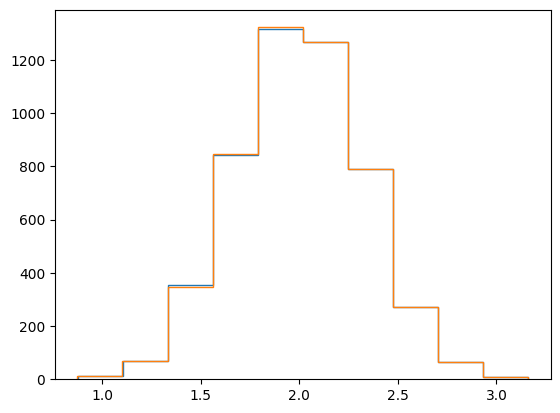

In [ ]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step')

In [ ]:
def log_liklihood(param):
    parent_mu, parent_sigma = param # mu is fixed and so is sigma
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = parent_sigma * np.random.randn(N_obs) + parent_mu
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_prior(param):
    parent_mu, parent_sigma = param
    if (true_mean_parent - 5 < parent_mu < true_mean_parent + 5 and 
        0.0 < parent_sigma < 1.0):
        return 0.0
    return -np.inf

def log_probability(param):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [ ]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent, true_scale_parent]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial)
parent_mu_ML, parent_sigma_ML = soln.x

print("Maximum likelihood estimates:")
print("mu = {0:.3f}".format(parent_mu_ML))
print("sigma = {0:.3f}".format(parent_sigma_ML))

Maximum likelihood estimates:
mu = 2.050
sigma = 0.306


In [ ]:
import emcee

pos = soln.x + 1e-2 * np.random.randn(50, 2)
nwalkers, ndim = pos.shape

#from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability#, pool=pool
    )
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:44<00:00, 111.73it/s]


State([[2.00346817 0.01043506]
 [2.00694926 0.01095952]
 [2.00758117 0.01519431]
 [1.99794697 0.01763564]
 [2.00803778 0.01801869]
 [2.00409683 0.01232381]
 [2.00518279 0.01369705]
 [2.00478958 0.01114352]
 [2.00162332 0.01207721]
 [2.00327641 0.01357449]
 [2.00435681 0.00972788]
 [2.00084042 0.01567464]
 [2.00819107 0.01109031]
 [2.00249053 0.01161884]
 [2.00754372 0.01814109]
 [2.00631969 0.0107554 ]
 [2.00553727 0.00992577]
 [2.00564068 0.01698099]
 [2.00541449 0.01494525]
 [2.00520918 0.01401657]
 [2.00558    0.01004319]
 [2.00568039 0.01512299]
 [2.00726981 0.01025671]
 [2.00245887 0.01500093]
 [2.00663646 0.00837183]
 [2.00251393 0.01253046]
 [2.00102889 0.0119588 ]
 [2.00293485 0.01099207]
 [2.0017038  0.01220163]
 [2.00172346 0.01018023]
 [2.0004394  0.01154256]
 [2.00496687 0.01174684]
 [2.00261791 0.00831351]
 [2.00535925 0.00764099]
 [2.00613546 0.01486634]
 [2.00390715 0.01530027]
 [2.00549247 0.01525446]
 [2.00410606 0.0100521 ]
 [2.00501477 0.01453523]
 [2.00430763 0.0110

Text(0.5, 0, 'step number')

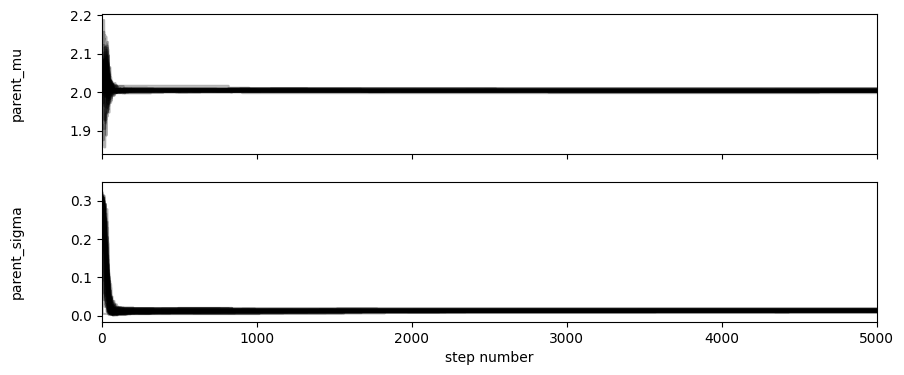

In [ ]:
fig, axes = plt.subplots(2, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu", "parent_sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

[66.29669836 39.66875309]


In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=10, flat=True)
print(flat_samples.shape)

(24500, 2)


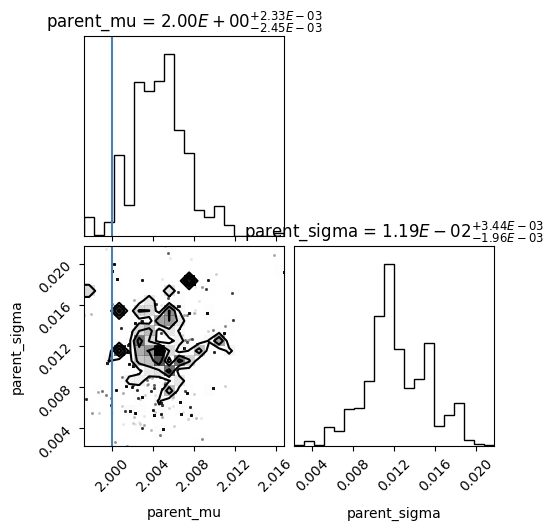

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent, true_scale_parent], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# Parent (Bimodal) - Child (Gaussians)

## mean of Child is derived from the Parent distribution

the trick used here is that fitting the child data for only the mean and the scale and not the whole child data

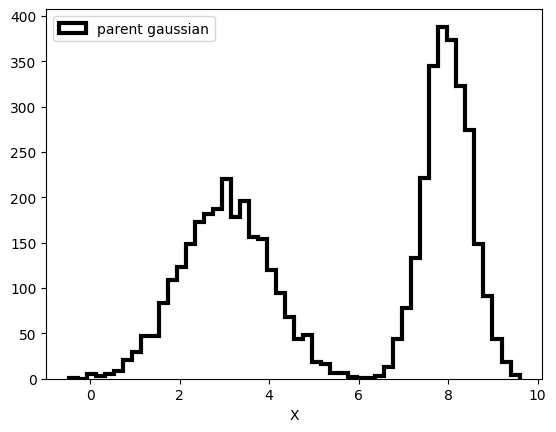

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent_A = 3
true_scale_parent_A = 1
true_mean_parent_B = 8
true_scale_parent_B = .5
true_scale_child = 0.01
N_obs, size_child = 5000, 10

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu_A, sigma_A, mu_B, sigma_B):
    return np.concatenate((np.random.normal(loc=mu_A, scale=sigma_A, size=N_obs//2), 
                           np.random.normal(loc=mu_B, scale=sigma_B, size=N_obs//2)), axis=0)

parent_data = gen_parent_data(true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian', bins=50)
plt.xlabel("X")
plt.legend()

(array([  1.,   0.,   5.,   3.,   5.,   8.,  21.,  29.,  47.,  47.,  83.,
        109., 123., 149., 173., 182., 187., 220., 178., 196., 156., 154.,
        120.,  94.,  68.,  44.,  48.,  18.,  16.,   6.,   6.,   2.,   1.,
          1.,   3.,  13.,  44.,  78., 133., 221., 345., 388., 373., 323.,
        274., 148.,  91.,  44.,  18.,   4.]),
 array([-0.4775555 , -0.27609539, -0.07463529,  0.12682482,  0.32828492,
         0.52974503,  0.73120513,  0.93266524,  1.13412534,  1.33558545,
         1.53704555,  1.73850566,  1.93996576,  2.14142586,  2.34288597,
         2.54434607,  2.74580618,  2.94726628,  3.14872639,  3.35018649,
         3.5516466 ,  3.7531067 ,  3.95456681,  4.15602691,  4.35748702,
         4.55894712,  4.76040723,  4.96186733,  5.16332744,  5.36478754,
         5.56624765,  5.76770775,  5.96916786,  6.17062796,  6.37208807,
         6.57354817,  6.77500828,  6.97646838,  7.17792848,  7.37938859,
         7.58084869,  7.7823088 ,  7.9837689 ,  8.18522901,  8.38668911,
 

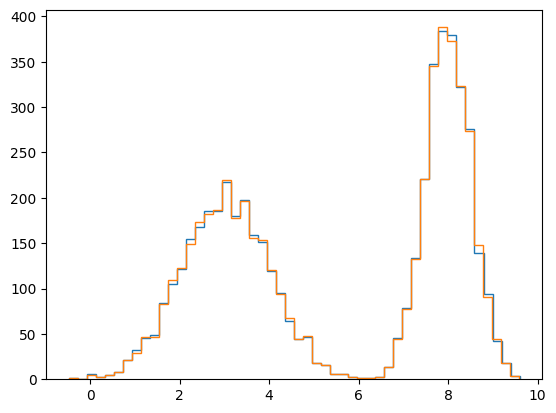

In [ ]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step',bins=50)
plt.hist(parent_data, fill=False, histtype='step',bins=50)

In [ ]:
def log_liklihood(param):
    parent_mu_A, parent_sigma_A, parent_mu_B, parent_sigma_B  = param # mu is fixed and so is sigma
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = np.concatenate((parent_sigma_A * np.random.randn(N_obs//2) + parent_mu_A,
                            parent_sigma_B * np.random.randn(N_obs//2) + parent_mu_B),
                            axis=0)
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_prior(param):
    parent_mu_A, parent_sigma_A, parent_mu_B, parent_sigma_B = param
    if (true_mean_parent_A - 5 < parent_mu_A < true_mean_parent_A + 5 and 
        0.0 < parent_sigma_A < 2 and
        true_mean_parent_B - 5 < parent_mu_B < true_mean_parent_B + 5 and 
        0.0 < parent_sigma_B < 2):
        return 0.0
    return -np.inf

def log_probability(param):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [ ]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B]) + 0.1 * np.random.randn(4)
soln = minimize(nll, initial)
parent_mu_A_ML, parent_sigma_A_ML, parent_mu_B_ML, parent_sigma_B_ML = soln.x

print("Maximum likelihood estimates:")
print("mu_A = {0:.3f}".format(parent_mu_A_ML))
print("sigma_A = {0:.3f}".format(parent_sigma_A_ML))
print("mu_B = {0:.3f}".format(parent_mu_B_ML))
print("sigma_B = {0:.3f}".format(parent_sigma_B_ML))

Maximum likelihood estimates:
mu_A = 3.050
sigma_A = 0.986
mu_B = 8.065
sigma_B = 0.652


In [ ]:
import emcee

pos = soln.x + 1e-2 * np.random.randn(50, 4)
nwalkers, ndim = pos.shape

#from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability#, pool=pool
    )
sampler.run_mcmc(pos, 10000, progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:08<00:00, 145.73it/s]


State([[3.02756969e+00 3.91901783e-02 8.01187794e+00 2.90353082e-02]
 [3.02774350e+00 4.02732000e-02 8.00189423e+00 2.16773093e-02]
 [3.02873639e+00 4.42064499e-02 8.01185038e+00 7.45531819e-03]
 [3.02221379e+00 4.78260740e-02 8.00501320e+00 1.38371226e-02]
 [3.03198308e+00 3.87032285e-02 8.00508249e+00 2.25281583e-02]
 [3.02013205e+00 3.10859400e-02 8.00471625e+00 2.74683982e-02]
 [3.02440467e+00 3.83913134e-02 8.00654815e+00 1.22549280e-02]
 [3.01754411e+00 4.79713618e-02 8.00887649e+00 1.70478137e-02]
 [3.02274544e+00 3.80510822e-02 8.00501417e+00 1.51338547e-02]
 [3.02198806e+00 4.35952643e-02 7.98334564e+00 7.22032437e-03]
 [3.01454220e+00 2.70430592e-02 7.99192350e+00 1.97122555e-02]
 [3.01687579e+00 4.84326531e-02 8.01403144e+00 1.67522739e-02]
 [3.01508852e+00 4.82495361e-02 8.00860233e+00 1.30290156e-02]
 [3.02275110e+00 4.18907619e-02 8.00029850e+00 2.43472696e-02]
 [3.01712218e+00 4.71547260e-02 8.01780179e+00 6.14278820e-04]
 [3.02594228e+00 3.32456695e-02 8.00648333e+00 2.

Text(0.5, 0, 'step number')

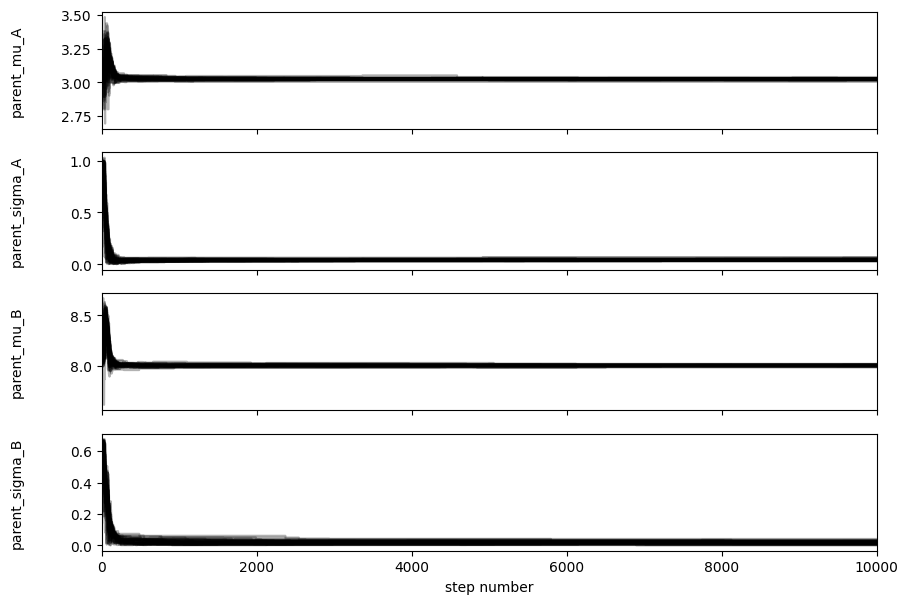

In [ ]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu_A", "parent_sigma_A", "parent_mu_B", "parent_sigma_B"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

[175.31666819  74.53556848 108.02447565 135.73832328]


In [ ]:
flat_samples = sampler.get_chain(discard=200, thin=15, flat=True)
print(flat_samples.shape)

(32650, 4)


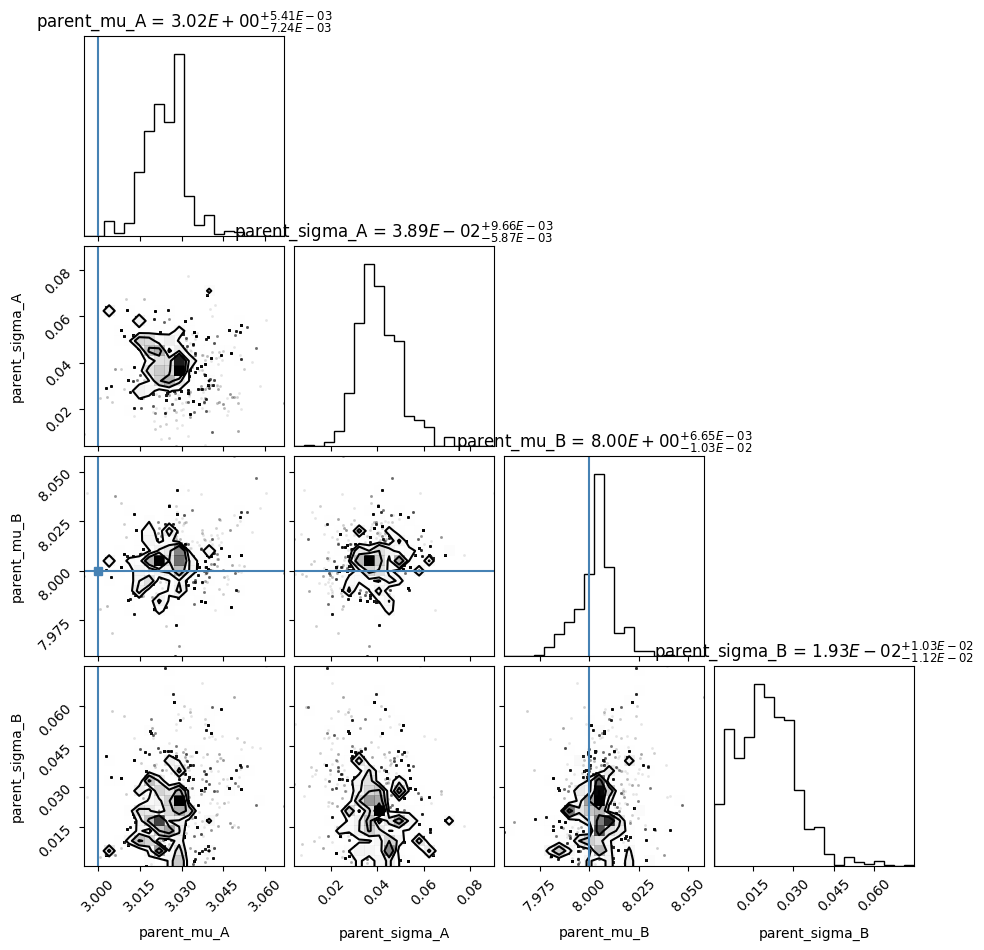

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# Parent (Mixed Gaussian) - Child (Gaussians)

## FIX SCALE

0.3415654694982557 0.23733789675518757 0.06771925307135529


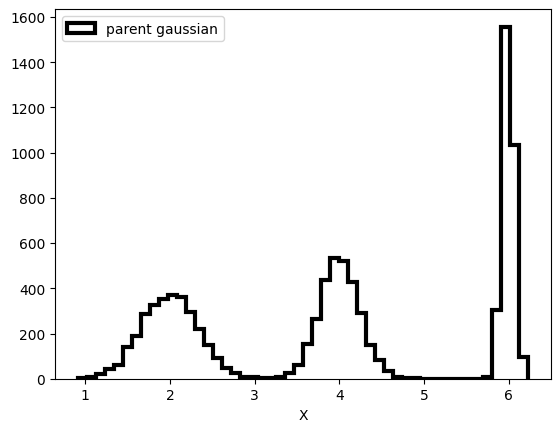

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent_A, true_mean_parent_B, true_mean_parent_C = 2, 4, 6
true_scale_parent_A, true_scale_parent_B, true_scale_parent_C = np.random.random(3)

print(true_mean_parent_A, true_mean_parent_B, true_mean_parent_C,
      true_scale_parent_A, true_scale_parent_B, true_scale_parent_C)

true_scale_child = 0.01

N_obs, size_child = 9000, 10

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu_A, sigma_A, mu_B, sigma_B, mu_C, sigma_C):
    return np.concatenate((np.random.normal(loc=mu_A, scale=sigma_A, size=N_obs//3), 
                           np.random.normal(loc=mu_B, scale=sigma_B, size=N_obs//3),
                           np.random.normal(loc=mu_C, scale=sigma_C, size=N_obs//3)), axis=0)

parent_data = gen_parent_data(true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B, true_mean_parent_C, true_scale_parent_C)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian', bins=50)
plt.xlabel("X")
plt.legend()

(array([3.000e+00, 7.000e+00, 2.100e+01, 4.300e+01, 6.200e+01, 1.390e+02,
        1.900e+02, 2.880e+02, 3.240e+02, 3.530e+02, 3.700e+02, 3.600e+02,
        2.940e+02, 2.190e+02, 1.490e+02, 9.000e+01, 4.600e+01, 2.400e+01,
        9.000e+00, 7.000e+00, 3.000e+00, 2.000e+00, 8.000e+00, 2.400e+01,
        5.900e+01, 1.530e+02, 2.640e+02, 4.380e+02, 5.350e+02, 5.220e+02,
        4.290e+02, 2.900e+02, 1.490e+02, 8.200e+01, 3.300e+01, 7.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 3.040e+02, 1.557e+03,
        1.036e+03, 9.700e+01]),
 array([0.90817858, 1.0146592 , 1.12113982, 1.22762044, 1.33410106,
        1.44058168, 1.5470623 , 1.65354291, 1.76002353, 1.86650415,
        1.97298477, 2.07946539, 2.18594601, 2.29242663, 2.39890725,
        2.50538787, 2.61186848, 2.7183491 , 2.82482972, 2.93131034,
        3.03779096, 3.14427158, 3.2507522 , 3.35723282, 3.46371344,
        3.57019405, 3.67667467, 3.78

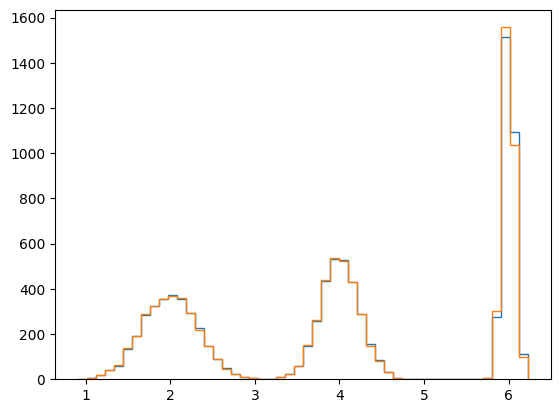

In [ ]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step',bins=50)
plt.hist(parent_data, fill=False, histtype='step',bins=50)

In [ ]:
def log_liklihood(param):
    parent_mean_A, parent_mean_B, parent_mean_C  = param 
    model = np.concatenate((true_scale_parent_A * np.random.randn(N_obs//3) + parent_mean_A,
                            true_scale_parent_B * np.random.randn(N_obs//3) + parent_mean_B,
                            true_scale_parent_C * np.random.randn(N_obs//3) + parent_mean_C),
                            axis=0)
    
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_prior(param):
    parent_mean_A, parent_mean_B, parent_mean_C = param
    if (true_mean_parent_A - 2< parent_mean_A < true_mean_parent_A + 2 and
        true_mean_parent_B - 2 < parent_mean_B < true_mean_parent_B + 2 and
        true_mean_parent_C - 2 < parent_mean_C < true_mean_parent_C + 2):
        return 0.0
    return -np.inf

def log_probability(param):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [ ]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent_A, true_mean_parent_B, true_mean_parent_C]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial)
parent_mu_A_ML, parent_mu_B_ML, parent_mu_C_ML = soln.x

print("Maximum likelihood estimates:")
print("sigma_A = {0:.3f}".format(parent_mu_A_ML))
print("sigma_B = {0:.3f}".format(parent_mu_B_ML))
print("sigma_C = {0:.3f}".format(parent_mu_C_ML))


Maximum likelihood estimates:
sigma_A = 2.050
sigma_B = 3.986
sigma_C = 6.065


In [ ]:
import emcee

pos = soln.x + 1e-2 * np.random.randn(50, 3)
nwalkers, ndim = pos.shape

from multiprocessing import Pool

with Pool() as pool:
    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability, pool=pool
    )
    sampler.run_mcmc(pos, 10000, progress=True)

100%|██████████| 10000/10000 [00:39<00:00, 252.24it/s]


Text(0.5, 0, 'step number')

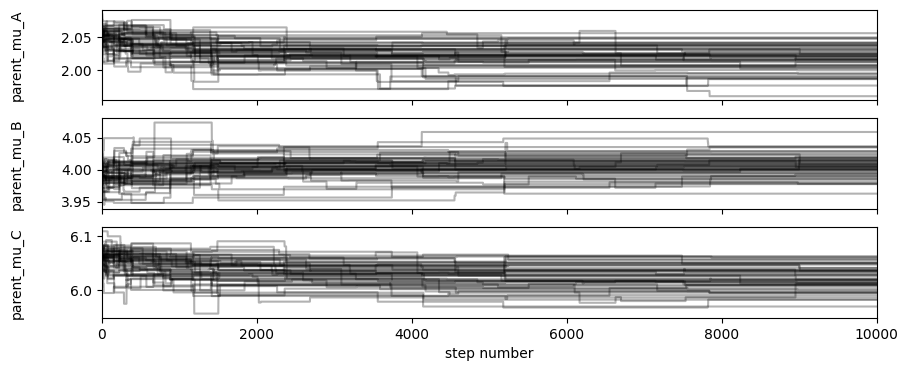

In [ ]:
fig, axes = plt.subplots(3, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu_A", "parent_mu_B", "parent_mu_C"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [1074.01696639  993.43607096 1101.36174551]

In [ ]:
flat_samples = sampler.get_chain(discard=300, thin=15, flat=True)
print(flat_samples.shape)

(32300, 3)


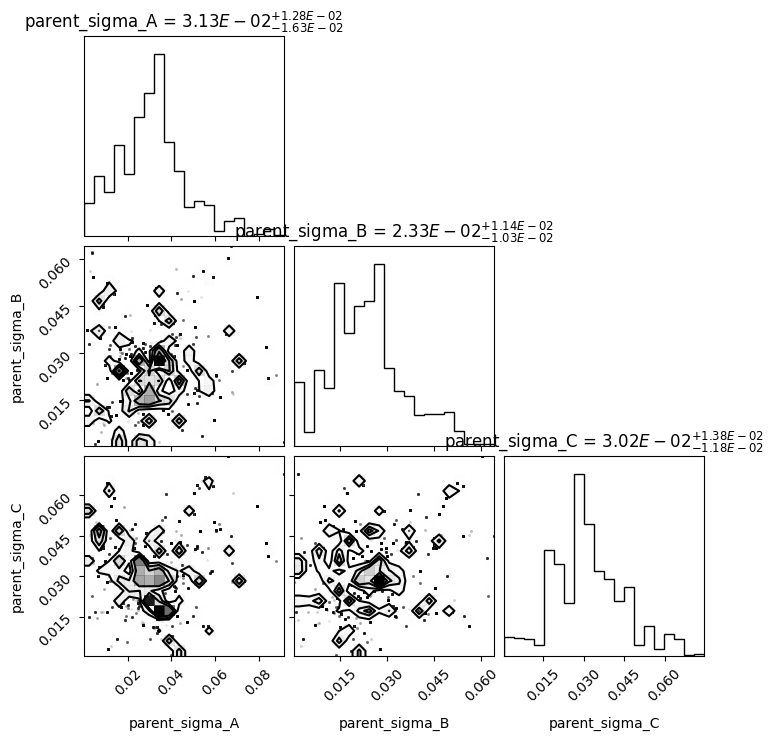

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent_A, true_mean_parent_B, true_mean_parent_C], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

## ALL VARYING 

2 4 6 0.19025052895238437 0.469324789659179 0.5541674549224924


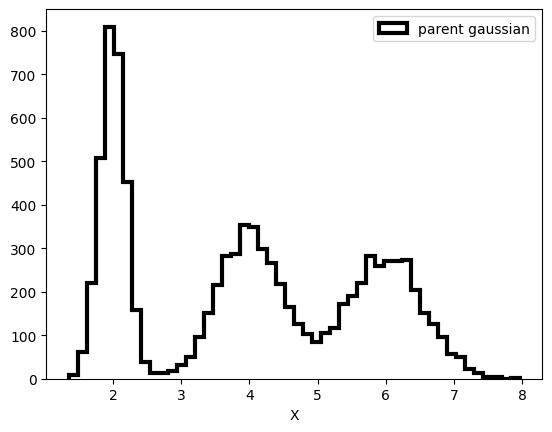

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent_A, true_mean_parent_B, true_mean_parent_C = 2, 4, 6
true_scale_parent_A, true_scale_parent_B, true_scale_parent_C = np.random.random(3)

print(true_mean_parent_A, true_mean_parent_B, true_mean_parent_C,
      true_scale_parent_A, true_scale_parent_B, true_scale_parent_C)

true_scale_child = 0.01

N_obs, size_child = 9000, 5

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu_A, sigma_A, mu_B, sigma_B, mu_C, sigma_C):
    return np.concatenate((np.random.normal(loc=mu_A, scale=sigma_A, size=N_obs//3), 
                           np.random.normal(loc=mu_B, scale=sigma_B, size=N_obs//3),
                           np.random.normal(loc=mu_C, scale=sigma_C, size=N_obs//3)), axis=0)

parent_data = gen_parent_data(true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B, true_mean_parent_C, true_scale_parent_C)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian', bins=50)
plt.xlabel("X")
plt.legend()

(array([  8.,  61., 221., 508., 809., 746., 451., 157.,  38.,  13.,  14.,
         17.,  32.,  50.,  95., 150., 216., 281., 286., 353., 348., 297.,
        266., 217., 164., 126., 102.,  85., 104., 117., 172., 191., 221.,
        283., 259., 270., 271., 274., 203., 151., 125.,  96.,  57.,  51.,
         22.,  14.,   3.,   3.,   0.,   2.]),
 array([1.35045202, 1.48264745, 1.61484287, 1.7470383 , 1.87923373,
        2.01142915, 2.14362458, 2.27582001, 2.40801543, 2.54021086,
        2.67240629, 2.80460171, 2.93679714, 3.06899257, 3.20118799,
        3.33338342, 3.46557885, 3.59777428, 3.7299697 , 3.86216513,
        3.99436056, 4.12655598, 4.25875141, 4.39094684, 4.52314226,
        4.65533769, 4.78753312, 4.91972854, 5.05192397, 5.1841194 ,
        5.31631483, 5.44851025, 5.58070568, 5.71290111, 5.84509653,
        5.97729196, 6.10948739, 6.24168281, 6.37387824, 6.50607367,
        6.63826909, 6.77046452, 6.90265995, 7.03485537, 7.1670508 ,
        7.29924623, 7.43144166, 7.56363708, 7.

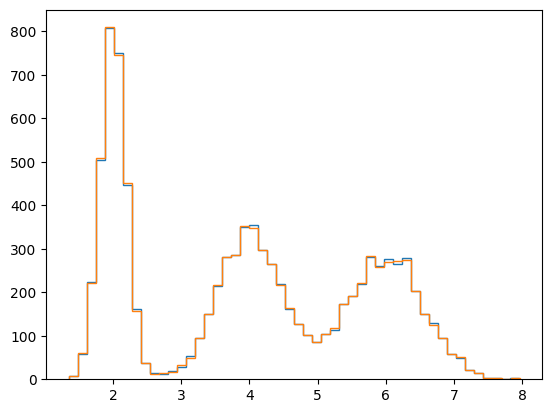

In [ ]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step',bins=50)
plt.hist(parent_data, fill=False, histtype='step',bins=50)

In [ ]:
def log_liklihood(param):
    parent_mu_A, parent_sigma_A, parent_mu_B, parent_sigma_B, parent_mu_C, parent_sigma_C  = param 
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = np.concatenate((parent_sigma_A * np.random.randn(N_obs//3) + parent_mu_A,
                            parent_sigma_B * np.random.randn(N_obs//3) + parent_mu_B,
                            parent_sigma_C * np.random.randn(N_obs//3) + parent_mu_C),
                            axis=0)
    
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_prior(param):
    parent_mu_A, parent_sigma_A, parent_mu_B, parent_sigma_B, parent_mu_C, parent_sigma_C = param
    if (true_mean_parent_A - 2 < parent_mu_A < true_mean_parent_A + 2 and 
        0.0 < parent_sigma_A < 1 and
        true_mean_parent_B - 2 < parent_mu_B < true_mean_parent_B + 2 and 
        0.0 < parent_sigma_B < 1 and
        true_mean_parent_C - 2 < parent_mu_C < true_mean_parent_C + 2 and 
        0.0 < parent_sigma_C < 1):
        return 0.0
    return -np.inf

def log_probability(param):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [ ]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B, true_mean_parent_C, true_scale_parent_C]) + 0.1 * np.random.randn(6)
soln = minimize(nll, initial)
parent_mu_A_ML, parent_sigma_A_ML, parent_mu_B_ML, parent_sigma_B_ML, parent_mu_C_ML, parent_sigma_C_ML = soln.x

print("Maximum likelihood estimates:")
print("mu_A = {0:.3f}".format(parent_mu_A_ML))
print("sigma_A = {0:.3f}".format(parent_sigma_A_ML))
print("mu_B = {0:.3f}".format(parent_mu_B_ML))
print("sigma_B = {0:.3f}".format(parent_sigma_B_ML))
print("mu_C = {0:.3f}".format(parent_mu_C_ML))
print("sigma_C = {0:.3f}".format(parent_sigma_C_ML))


Maximum likelihood estimates:
mu_A = 2.050
sigma_A = 0.176
mu_B = 4.065
sigma_B = 0.622
mu_C = 5.977
sigma_C = 0.531


In [ ]:
import emcee

pos = soln.x + 1e-2 * np.random.randn(50, 6)
nwalkers, ndim = pos.shape

#from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability, #pool=pool
    )
sampler.run_mcmc(pos, 10000, progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:52<00:00, 89.28it/s]


State([[1.99731644e+00 1.46686473e-02 3.99119684e+00 1.46042517e-02
  5.99459992e+00 2.54704168e-02]
 [1.99844028e+00 1.66688705e-02 3.99249345e+00 1.11100163e-02
  5.99285279e+00 2.65585194e-02]
 [1.99941470e+00 9.16586334e-03 3.99127385e+00 7.39415140e-03
  5.98912277e+00 1.74860471e-02]
 [1.99510428e+00 5.10976123e-03 3.98773552e+00 1.62402820e-02
  5.99303555e+00 2.20497081e-02]
 [1.99412239e+00 2.09079665e-02 3.98692821e+00 1.36552937e-02
  5.99560260e+00 3.35204042e-02]
 [2.00160783e+00 1.48456283e-02 3.98382072e+00 1.09514350e-02
  5.99023573e+00 2.09076989e-02]
 [2.00368904e+00 1.59602376e-02 3.98496791e+00 1.13842386e-02
  5.99951672e+00 2.85290894e-02]
 [1.99272560e+00 7.94035423e-03 3.99362652e+00 6.92232170e-03
  6.00379846e+00 4.79431679e-02]
 [1.99954406e+00 1.22433835e-02 3.98591538e+00 1.18006315e-02
  5.99014158e+00 2.07825354e-02]
 [1.99739627e+00 1.69653319e-02 3.98488136e+00 1.64570153e-02
  5.98955166e+00 2.35915328e-02]
 [1.99273204e+00 8.03249611e-03 3.99415911e+

Text(0.5, 0, 'step number')

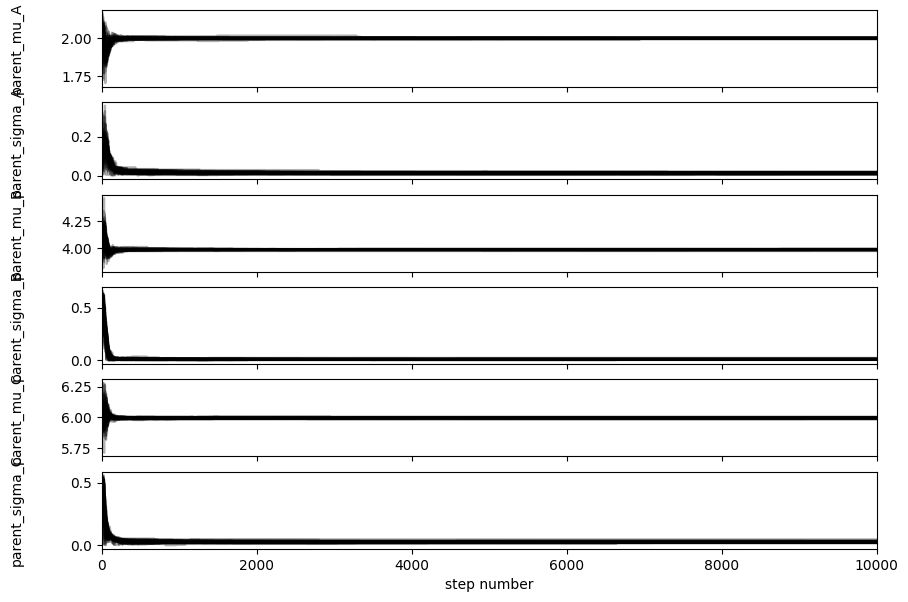

In [ ]:
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu_A", "parent_sigma_A", "parent_mu_B", "parent_sigma_B", "parent_mu_C", "parent_sigma_C"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [ 95.67486273 248.71910301  71.32658778  74.76705542  94.76720847
 101.07990736]

In [ ]:
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
print(flat_samples.shape)

(31650, 6)


ValueError: Provided figure has 36 axes, but data has dimensions K=4

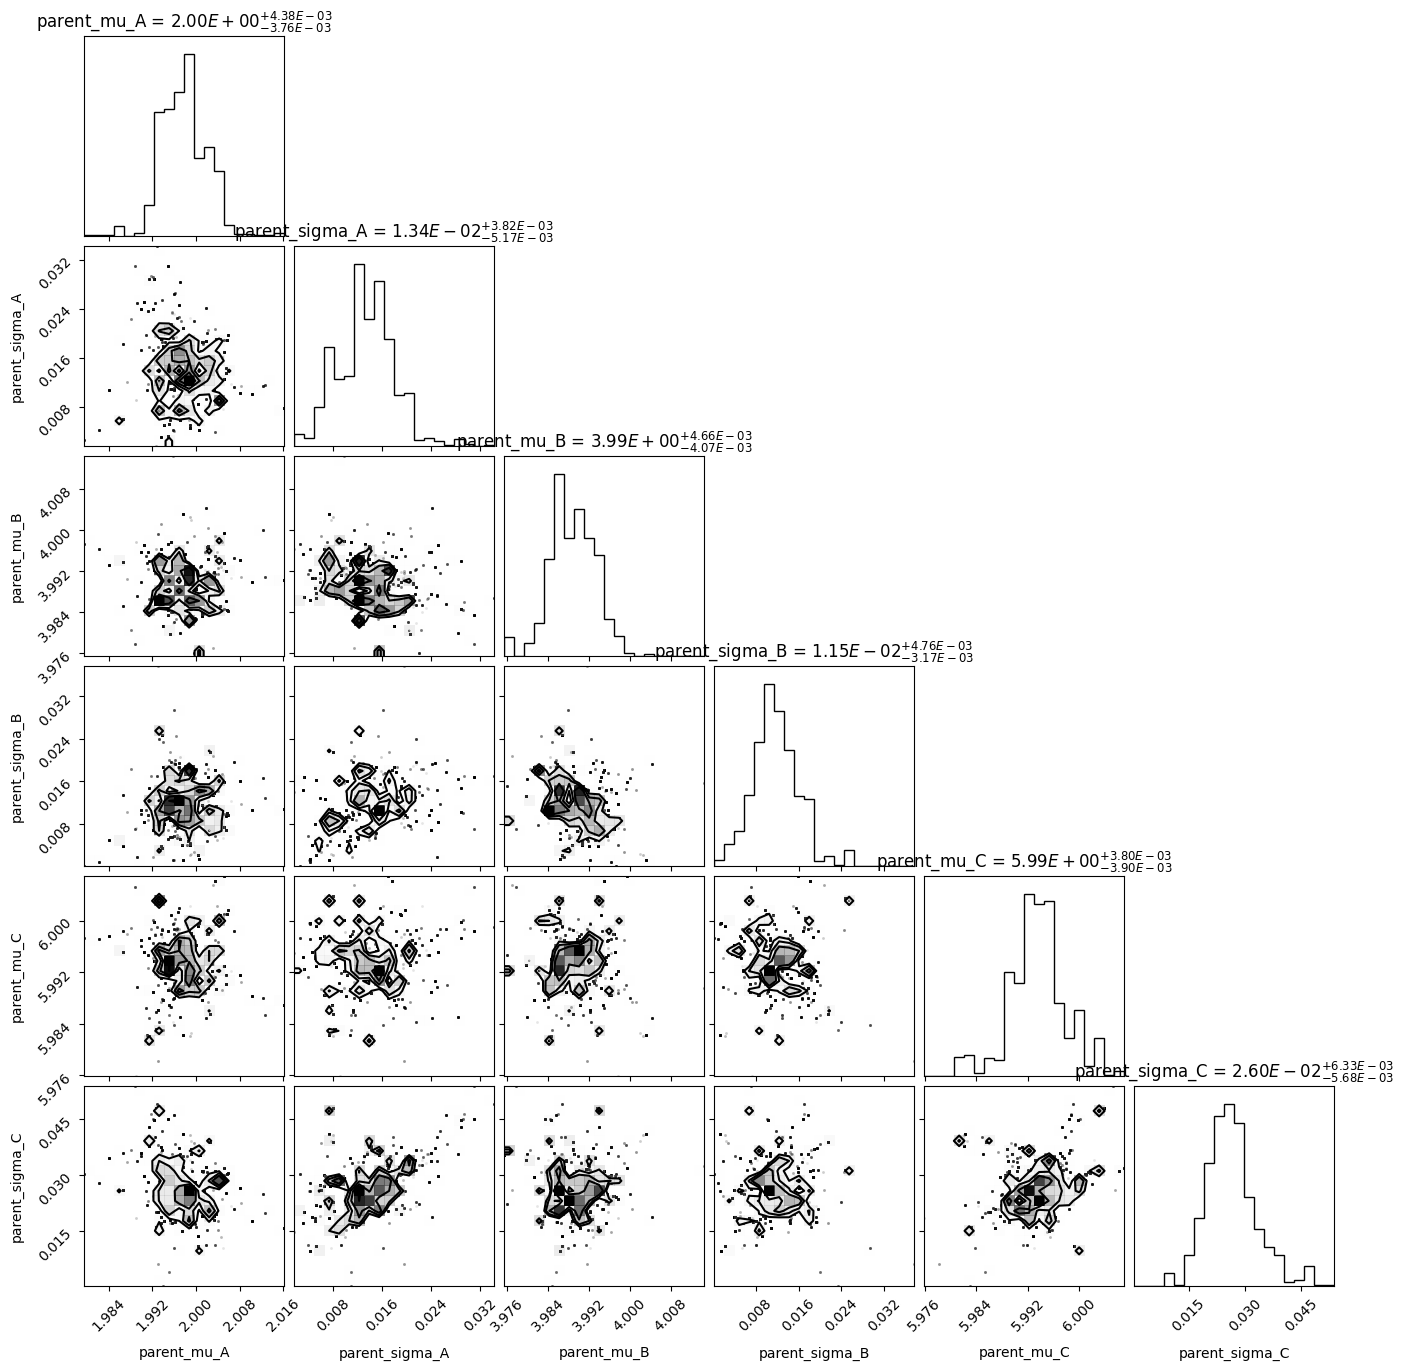

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# TESTING SIMPLE GAUSSIAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

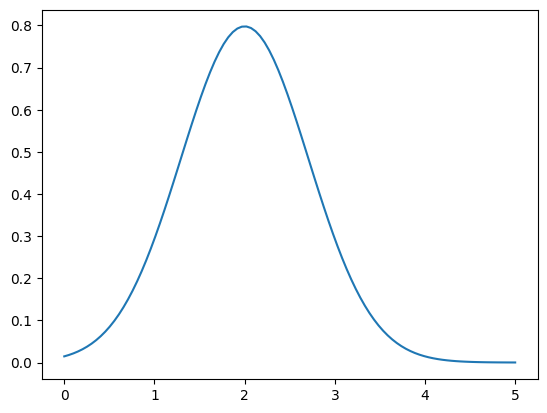

In [2]:
N = 100
x = np.linspace(0, 5, N)

mu_i = 2
sigma_i = .5
X_ji = (2 * np.pi * sigma_i**2)**(-0.5) * np.exp(-((x - mu_i)**2 / (2 * sigma_i)**2))
plt.plot(x, X_ji)

In [3]:
def log_likelihood(param):
    mu, sigma = param
    model = (2 * np.pi * sigma**2)**(-0.5) * np.exp(-((x - mu)**2 / (2 * sigma)**2))
    return - 0.5 * np.sum((X_ji - model)**2)

In [4]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([mu_i, sigma_i]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial)
mu_ml, sigma_ml = soln.x

print("Maximum likelihood estimates:")
print("mu = {0:.3f}".format(mu_ml))
print("sigma = {0:.3f}".format(sigma_ml))


Maximum likelihood estimates:
mu = 2.000
sigma = 0.500


In [5]:
def log_prior(param):
    mu, sigma = param
    if (0 < mu < 5 and
        0 < sigma < 1):
        return 0
    return -np.inf

def log_probability(param):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(param)

In [6]:
import emcee

pos = soln.x + 1e-6 * np.random.randn(50, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability
)
sampler.run_mcmc(pos, 8000, progress=True)

100%|██████████| 8000/8000 [00:04<00:00, 1827.37it/s]


State([[1.63313821 0.95952469]
 [1.9304333  0.59020662]
 [2.41353078 0.48800754]
 [2.06551589 0.50803928]
 [2.08586954 0.48338249]
 [2.34324555 0.6625184 ]
 [1.96576988 0.56244171]
 [1.18461307 0.87303607]
 [2.16719977 0.92911708]
 [2.20047039 0.77806722]
 [1.94673484 0.50060868]
 [1.9373143  0.66269459]
 [1.22595376 0.57778222]
 [2.23105536 0.50755542]
 [2.04507765 0.69437574]
 [2.34338807 0.58684425]
 [2.16585966 0.83569162]
 [2.4071661  0.6037661 ]
 [1.80054214 0.47686394]
 [1.72683745 0.50441566]
 [1.93708174 0.79604875]
 [2.03116989 0.68886879]
 [2.09872164 0.51093796]
 [2.14819285 0.98124481]
 [2.30355328 0.64516799]
 [2.29743265 0.79118174]
 [2.12208551 0.98089616]
 [2.36347122 0.78443054]
 [1.8320062  0.64397817]
 [2.51674898 0.65739952]
 [1.5469513  0.90481579]
 [2.13069904 0.706093  ]
 [1.93955663 0.49449846]
 [1.48970401 0.59891993]
 [2.36628031 0.60095455]
 [1.7164704  0.39239972]
 [1.92659388 0.55432341]
 [2.35323432 0.80108173]
 [2.0203311  0.53607172]
 [2.09877647 0.5418

Text(0.5, 0, 'step number')

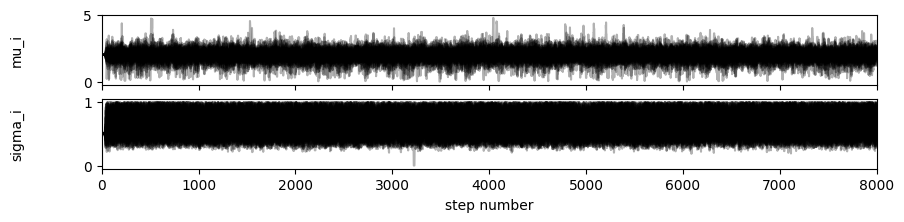

In [7]:
fig, axes = plt.subplots(2, figsize=(10, 2), sharex=True)
samples = sampler.get_chain()
labels = ["mu_i", "sigma_i"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [8]:
tau = sampler.get_autocorr_time()
print(tau)

[32.22423335 36.10309432]


In [9]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(26300, 2)


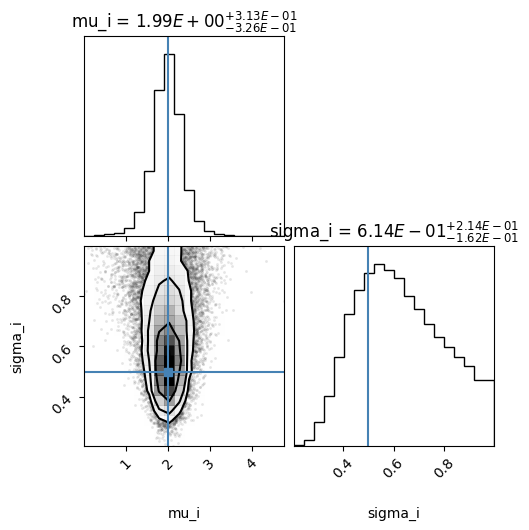

In [10]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[mu_i, sigma_i], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# HM model (extended)

In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

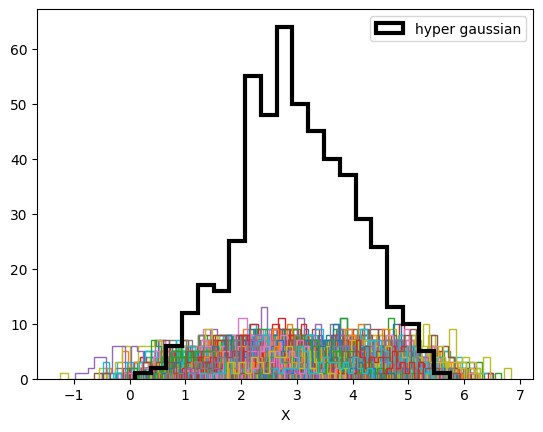

In [2]:
def generate_data(mean, scale, size):
    """
    Function to generate a Gaussian distribution with specified mean, scale and size. 
    """
    return np.random.normal(loc=mean, scale=scale, size=size)

# True parameters for the parent + child Gaussian distribution

true_parent_mean = 3.0 # hyperparameter
true_parent_scale = 1 # hyperparameter
true_child_scale = 0.5

N_obs = 500
size_child = 50

# Hypothesis for parent gaussian 
parent_gaussian = generate_data(true_parent_mean, true_parent_scale, size=N_obs)

child_gaussian = np.random.normal(loc=parent_gaussian[:, np.newaxis], scale=true_child_scale, size=(N_obs, size_child))

for i in range(N_obs):
    plt.hist(child_gaussian[i], fill=False, histtype='step', bins=20)
plt.hist(parent_gaussian, fill=False, histtype='step', color='black',linewidth=3, label='hyper gaussian', bins=20)
plt.xlabel("X")
plt.legend()

In [3]:
def log_likelihood(params):
    parent_mean, parent_scale = params
    weights = np.log(np.sum(
                (2 * np.pi * true_child_scale**2)**(-0.5) * \
                np.exp(-(child_gaussian - np.expand_dims(child_gaussian.mean(axis=1), axis=1))**2 / \
                (2 * true_child_scale**2)),
                axis=1))
    chi_sq = ((child_gaussian.mean(axis=1) - parent_mean) / (2 * parent_scale))**2
    return - 0.5 * N_obs * np.log(2 * np.pi * parent_scale**2 * size_child**2) - np.sum(chi_sq + weights)

In [4]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([true_parent_mean, true_parent_scale]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial)
mu_ml, sigma_ml = soln.x
    
print("Maximum likelihood estimates:")
print("mu = {0:.3f}".format(mu_ml))
print("sigma = {0:.3f}".format(sigma_ml))

Maximum likelihood estimates:
mu = 3.010
sigma = 0.717


In [5]:
def log_prior(params):
    parent_mean, parent_scale = params
    # Flat priors 
    if (0 < parent_mean < 5 and 
        0 < parent_scale < 5):
        return 0.0
    return -np.inf

def log_probability(params):
    log_prior_val = log_prior(params)
    if not np.isfinite(log_prior_val):
        return -np.inf
    return log_prior_val + log_likelihood(params)

In [6]:
import emcee

pos = soln.x + 1e-6 * np.random.randn(50, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability
)
sampler.run_mcmc(pos, 5000, progress=True)

  0%|          | 12/5000 [00:00<00:41, 119.00it/s]

100%|██████████| 5000/5000 [00:38<00:00, 130.82it/s]


State([[3.07453558 0.73241309]
 [2.93214572 0.72737919]
 [2.93285256 0.74705237]
 [3.08836093 0.70219015]
 [3.06214356 0.74788959]
 [2.95966985 0.69700497]
 [2.99803025 0.71744809]
 [3.03018366 0.66625591]
 [3.00105978 0.71397342]
 [2.95712686 0.70698514]
 [2.94416637 0.72419576]
 [2.93953988 0.72590542]
 [2.98964597 0.72233967]
 [2.99165794 0.70129571]
 [2.95662264 0.71411057]
 [3.01723817 0.72984789]
 [3.0513363  0.71505399]
 [3.09151035 0.70807843]
 [3.04660845 0.72979872]
 [3.00868901 0.75235847]
 [3.02221151 0.74026443]
 [3.14097207 0.73346807]
 [3.08630515 0.7228314 ]
 [3.01138162 0.68765739]
 [3.03900269 0.70859718]
 [3.04827187 0.73572411]
 [2.97861366 0.72324996]
 [3.04958691 0.76229707]
 [2.92835088 0.69574718]
 [3.0210808  0.70151038]
 [3.03916043 0.75828624]
 [3.16594247 0.72651157]
 [3.06054544 0.7068504 ]
 [3.03107607 0.7152106 ]
 [2.9102334  0.64731336]
 [3.05521844 0.68915625]
 [3.05592917 0.73521718]
 [3.03149782 0.66262815]
 [3.01806742 0.69139831]
 [3.04903572 0.7377

Text(0.5, 0, 'step number')

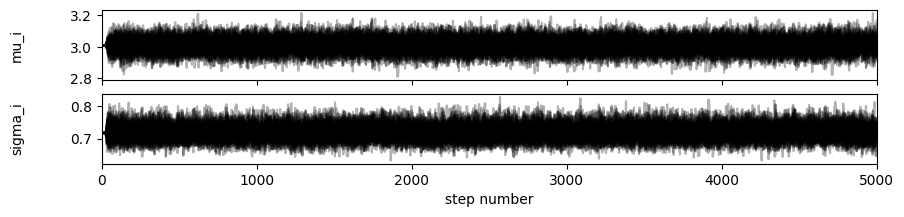

In [7]:
fig, axes = plt.subplots(2, figsize=(10, 2), sharex=True)
samples = sampler.get_chain()
labels = ["mu_i", "sigma_i"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [8]:
tau = sampler.get_autocorr_time()
print(tau)

[29.99981453 28.44954705]


In [9]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(16300, 2)


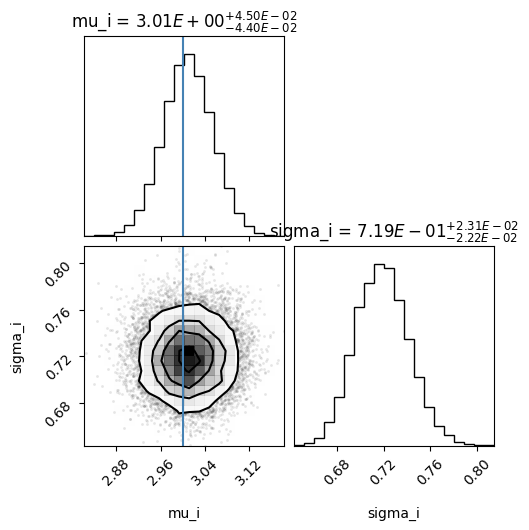

In [10]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_parent_mean, true_parent_scale], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)